In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdp_tut_functions as mdp
import env_functions as ef
from rl_utils import running_mean, discount_rwds

# set seed for pseudorandom number generation -- make sure our trajectories look the same
np.random.seed(123)

%matplotlib inline

from importlib import reload

# Section 1: Understanding the Markov Decision Process

## Markov Process (Markov Chain)
 
<b> DEF </b> A state $S_t$ is said to be Markov if and only if the following holds:

> $\mathbb{P} [S_{t+1} | S_t ] =  \mathbb{P} [S_{t+1} |S_1, S_2, ..., S_t ]$

That is, the future is independent of the past given the present. 


A Markov process is a memoryless random process, i.e. a sequence of random states $S_1, S_2, ...$ which have the Markov Property.

<b> DEF </b> A Markov Process is a tuple $\langle \mathcal{S}, \mathcal{P} \rangle$ such that: 

> $\mathcal{S}$ is a finite set of states
>
> $\mathcal{P}$ is the state transition probability matrix, which defines the probability of moving from one state $s$ into a successor state $s'$ 
> $\qquad \mathcal{P} =  \left[\begin{array}{c c c}
                       \mathcal{P}_{11} & \cdots & \mathcal{P}_{1n}\\
                       \vdots & \ddots & \vdots \\
                       \mathcal{P}_{n1}& \cdots & \mathcal{P}_{nn} 
                              \end{array}\right] $
>
> Where  $\mathcal{P}_{ss'} = \mathbb{P}[S_{t+1} = s' | S_{t} = s] $

#### Student Example Markov Process
We can illustrate the Markov Process as follows:
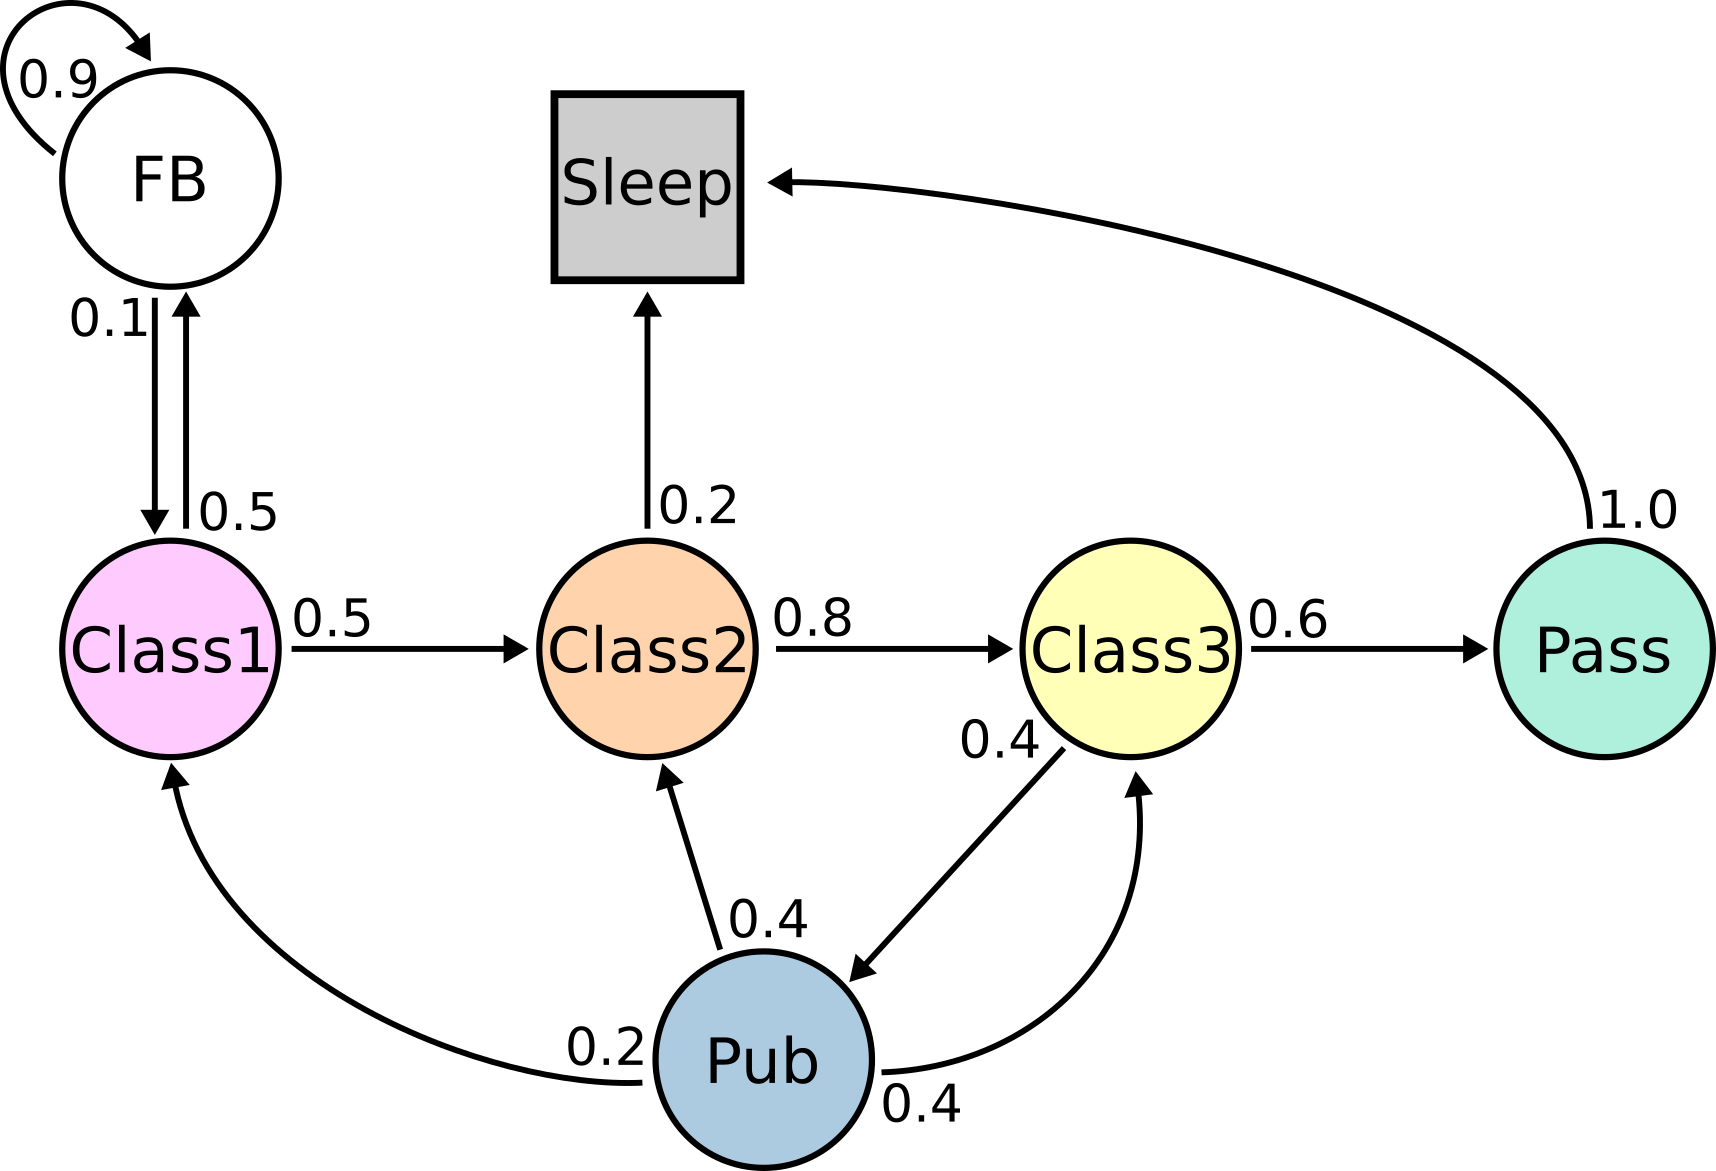

This Markov Process has states $\mathcal{S} = $
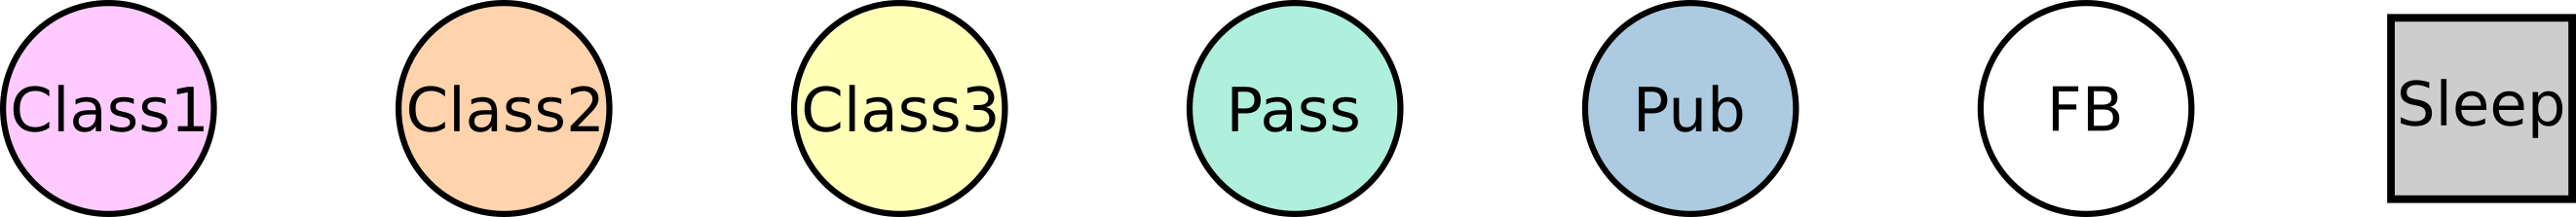

With state transition probability matrix $\mathcal{P} =$ 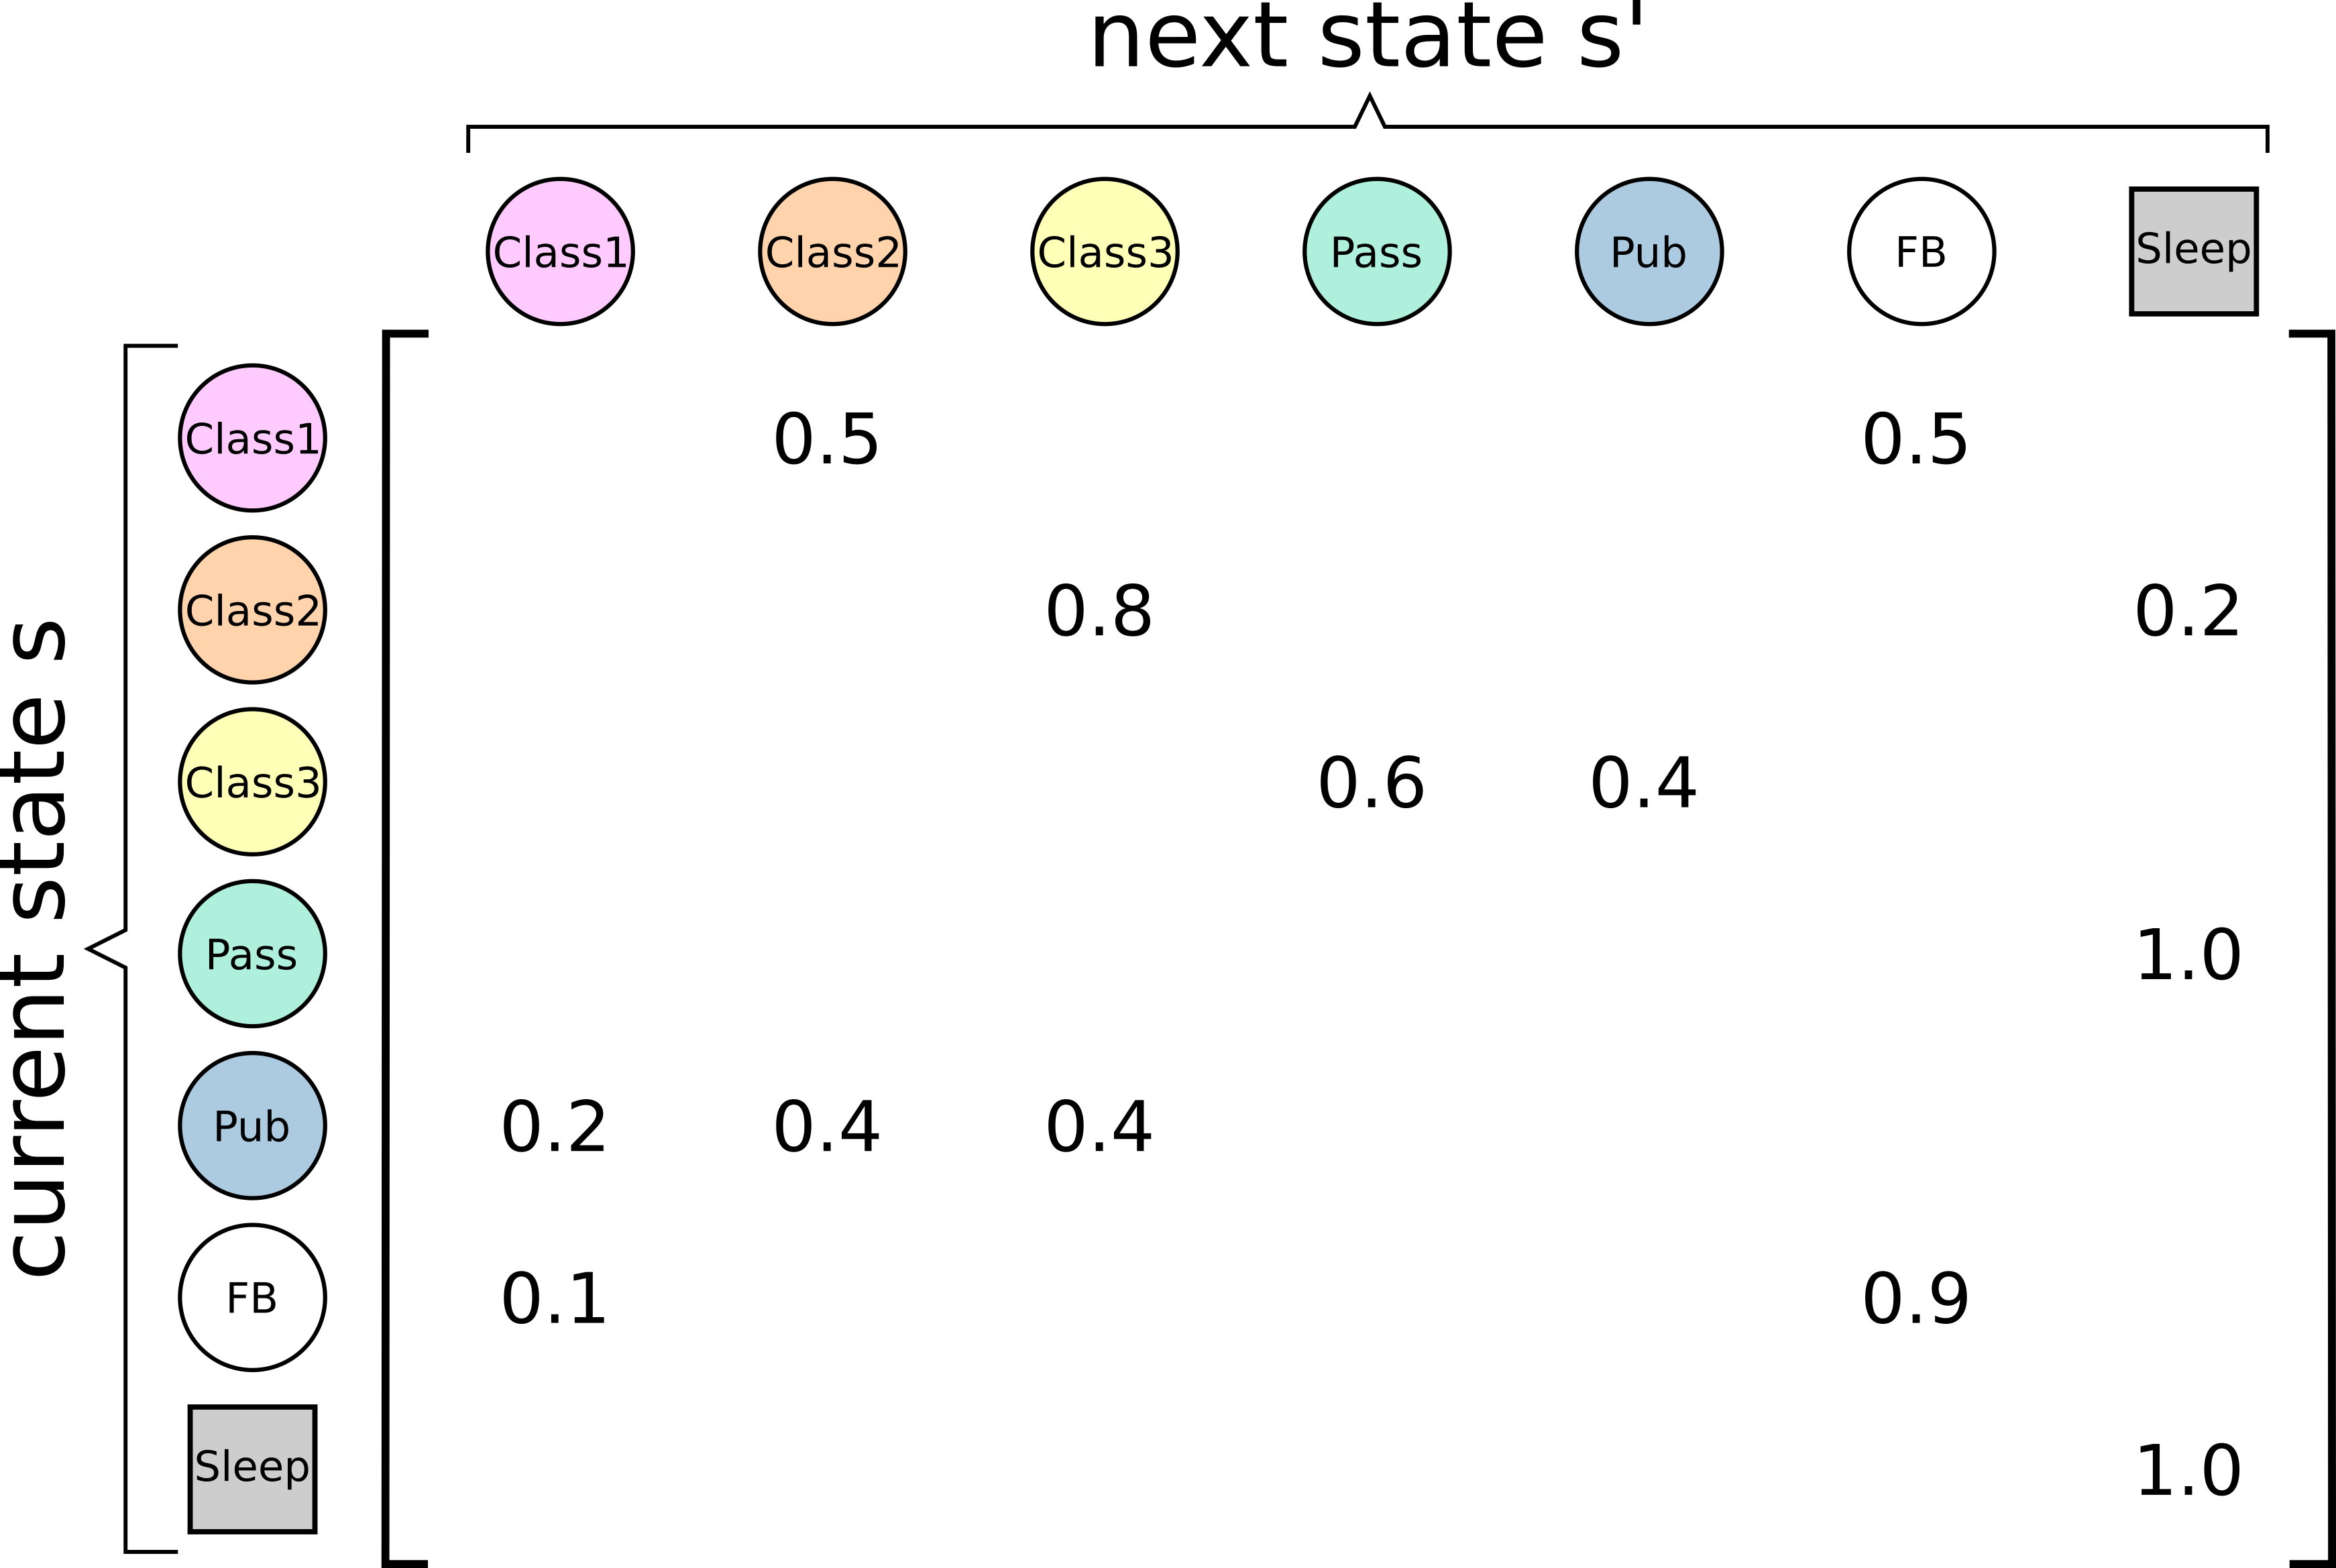

In [2]:
state_names = np.array(["C1", "C2", "C3", "Pass", "Pub", "FB", "Sleep"])
n_states = len(state_names)

# a markov process is fully defined by the tuple <S,P>
S = np.arange(n_states) # numerical index for each state
P = np.array([[0.0,  0.5, 0.,  0.,  0.,  0.5, 0. ], # matrix representing transition probabilities between states
              [0.,  0.,  0.8, 0.,  0.,  0.,  0.2],
              [0.,  0.,  0.,  0.6, 0.4, 0.,  0. ],
              [0.,  0.,  0.,  0.,  0.,  0.,  1.0],
              [0.2, 0.4, 0.4, 0.,  0.,  0.,  0. ],
              [0.1, 0.,  0.,  0.,  0.,  0.9, 0. ],
              [0.,  0.,  0.,  0.,  0.,  0.,  1.0]])

# print S,P
print("State Indices:\n",S)
print('==========')

print("Transition Matrix:\n",P)

State Indices:
 [0 1 2 3 4 5 6]
Transition Matrix:
 [[0.  0.5 0.  0.  0.  0.5 0. ]
 [0.  0.  0.8 0.  0.  0.  0.2]
 [0.  0.  0.  0.6 0.4 0.  0. ]
 [0.  0.  0.  0.  0.  0.  1. ]
 [0.2 0.4 0.4 0.  0.  0.  0. ]
 [0.1 0.  0.  0.  0.  0.9 0. ]
 [0.  0.  0.  0.  0.  0.  1. ]]


In [3]:
print("Sum of values in each row")
for ind, row in enumerate(P):
    print(f'P(transition from {state_names[ind]}): {sum(row)}')

print('==========')

print("Sum of values in each column")
for ind, col in enumerate(P.T):
    print(f'P(transition to {state_names[ind]}): {sum(col)}')

Sum of values in each row
P(transition from C1): 1.0
P(transition from C2): 1.0
P(transition from C3): 1.0
P(transition from Pass): 1.0
P(transition from Pub): 1.0
P(transition from FB): 1.0
P(transition from Sleep): 1.0
Sum of values in each column
P(transition to C1): 0.30000000000000004
P(transition to C2): 0.9
P(transition to C3): 1.2000000000000002
P(transition to Pass): 0.6
P(transition to Pub): 0.4
P(transition to FB): 1.4
P(transition to Sleep): 2.2


The sum of values in each row of P describe the probability of transitioning out of a specific state $s$. All transitions from state $s$ into other states will sum to 1, since when you leave state $s$ you have to end up <i>somewhere</i>.

<b><span style="color: blue;">What do the columns of P represent? </span></b>

#### We can sample trajectories from the environment given $\mathcal{S}$ and $\mathcal{P}$:

In [4]:
# collect sample trajectories
num_samples = 10
for i in range(num_samples):
    T = mdp.sample_MC_trajectory(S,P)
    print(f"T{i+1} = {T}")

T1 = ['C3', 'Pass', 'Sleep']
T2 = ['Pub', 'C2', 'C3', 'Pass', 'Sleep']
T3 = ['C2', 'C3', 'Pub', 'C2', 'C3', 'Pub', 'C2', 'C3', 'Pass', 'Sleep']
T4 = ['C3', 'Pass', 'Sleep']
T5 = ['C1', 'C2', 'C3', 'Pass', 'Sleep']
T6 = ['Pub', 'C2', 'Sleep']
T7 = ['Pub', 'C1', 'C2', 'C3', 'Pass', 'Sleep']
T8 = ['FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'C1', 'C2', 'C3', 'Pub', 'C2', 'C3', 'Pass', 'Sleep']
T9 = ['Pub', 'C3', 'Pub', 'C1', 'FB', 'FB', 'FB', 'FB', 'C1', 'FB', 'FB', 'FB', 'C1', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'C1', 'C2', 'C3', 'Pub', 'C3', 'Pass', 'Sleep']
T10 = ['FB', 'C1', 'FB', 'FB', 'FB', 'FB', 'FB', 'C1', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'C1', 'C2', 'C3', 'Pass', 'Sleep']


#### Our ultimate goal in reinforcement learning is to behave in such a way that we maximize our long term future reward. 

A Markov Process has no notion of reward or of behaviour, so let's add these in one at a time. 

## Markov Reward Proccess (MRP)
A Markov reward process is a Markov Chain (Markov Process) with values.

<b> DEF </b> A Markov Reward Process (MRP) is a tuple $\langle \mathcal{S}, \mathcal{P},$ <span style="color: red;">$\mathcal{R}, \gamma $</span>$\rangle$ such that: 

> $\mathcal{S}$ is a finite set of states
>
> $\mathcal{P}$ is the state transition probability matrix, which defines the probability of moving from one state $s$ into a successor state $s'$ 
> $\qquad \mathcal{P} =  \left[\begin{array}{c c c}
                       \mathcal{P}_{11} & \cdots & \mathcal{P}_{1n}\\
                       \vdots & \ddots & \vdots \\
                       \mathcal{P}_{n1}& \cdots & \mathcal{P}_{nn} 
                              \end{array}\right] $
>
> Where  $\mathcal{P}_{ss'} = \mathbb{P}[S_{t+1} = s' | S_{t} = s] $
>
> <span style="color: red;">$\mathcal{R}$ is a reward function where $\mathcal{R_{s}} = \mathbb{E}[R_{t+1} | S_{t} = s] $</span> 
>
> <span style="color: red;">$\gamma$ is a discount factor and $\gamma \in [0,1]$</span>

#### Student Example with Reward
The Markov Reward Process is the same as the Markov Process above, but states have associated rewards. 
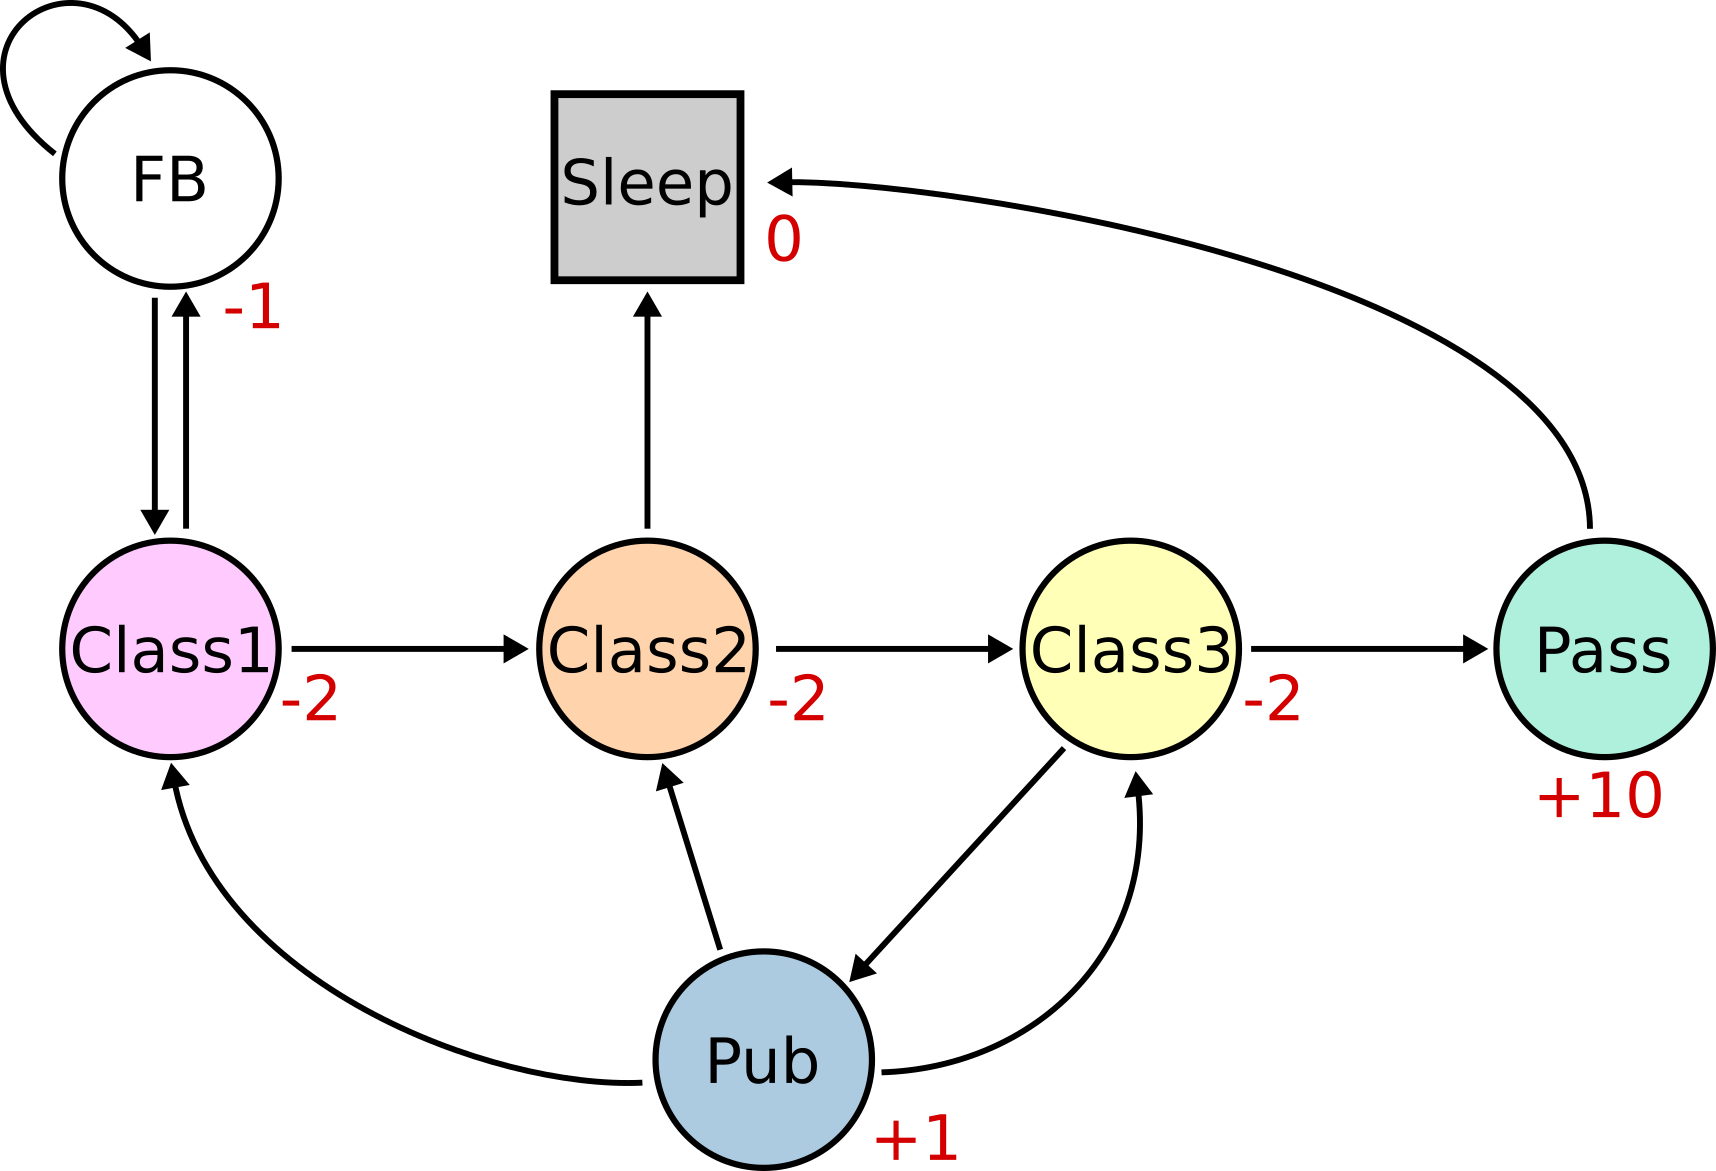

We have the same state transition probability matrix $\mathcal{P} =$
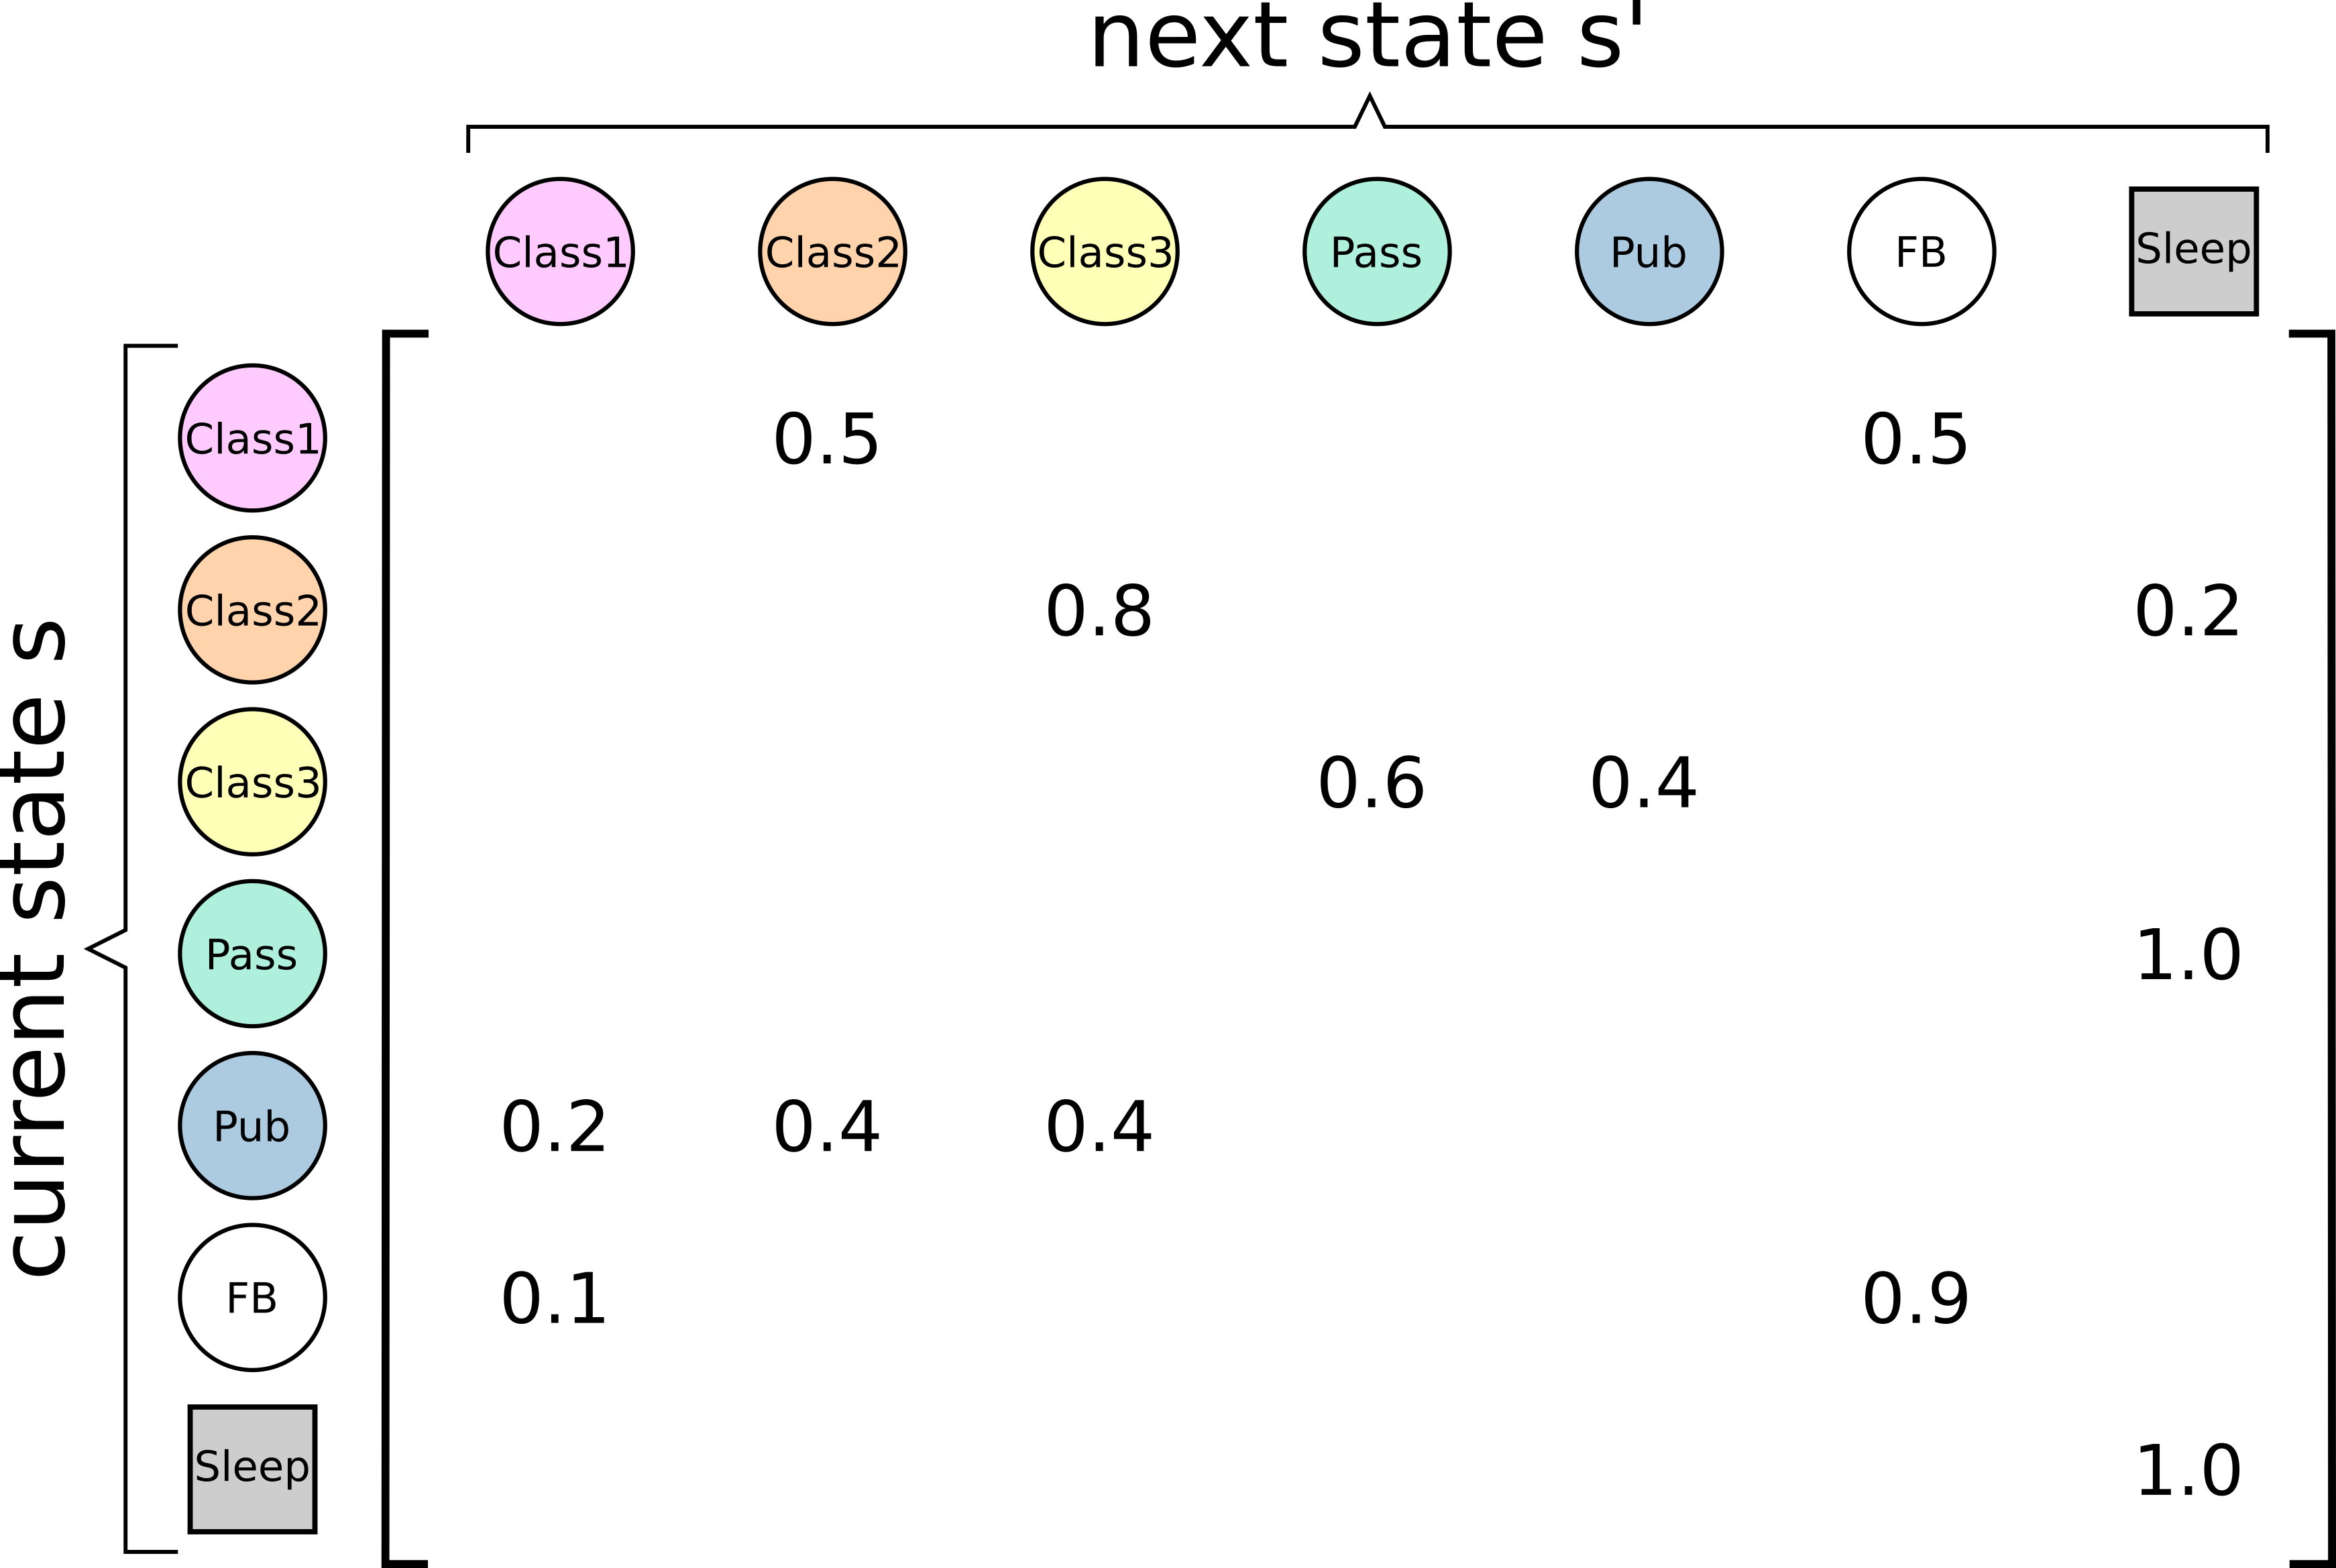

The reward function $\mathcal{R}$ describes how much reward we get upon leaving a state. 

We can write it as a vector with a scalar value corresponding to each state, i.e. $\mathcal{R}= $ 
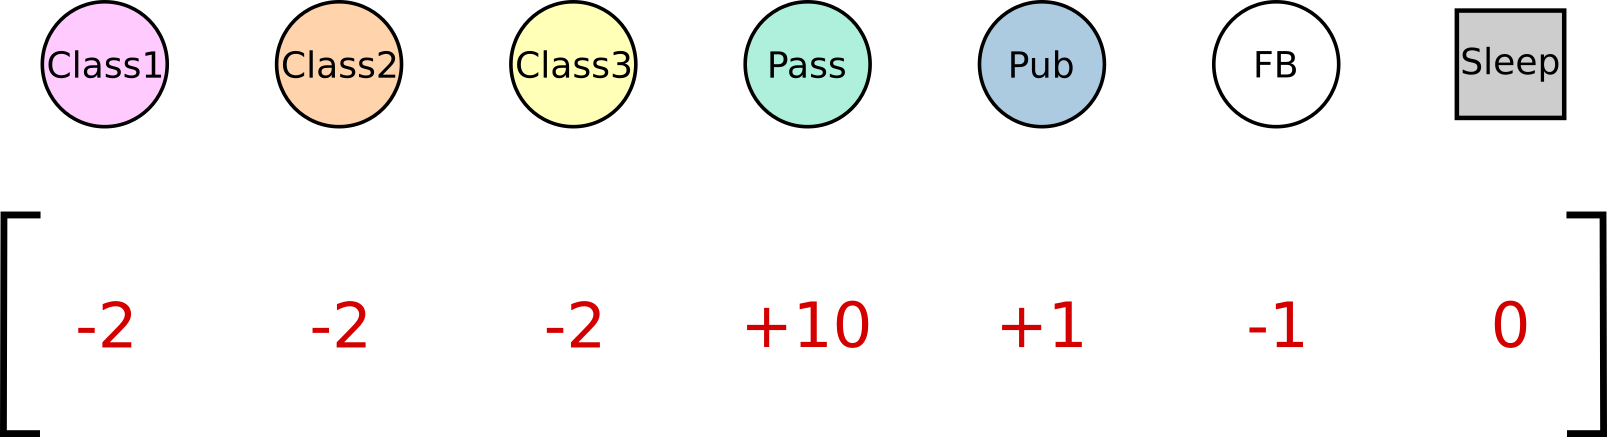

### Note: rewards can also be action-dependent! 
Notice above we have $R^{a}_{s}$ -- upon leaving a state, the environment may reward the agent differently depending on the action taken. 

For simplicity in this tutorial we will just take the rewards to be the same for all actions taken. 

<b><span style='color:DarkGreen'> Homework: write a reward function as a matrix of size (n_states x n_actions), which takes current state and action as arguments and returns the appropriate reward value (you pick what those rewards are). Hint: start with a reward matrix in which only one action leads to rewards.</span></b>

In [5]:
###########
# Homework 
###########
## recall  R = [-2., -2., -2., 10., 1., -1., 0.]

## To Do: write the reward function as a matrix

## Bonus: write the reward function as an actual python function that takes either state or state/action 
#   as arguments and returns the reward: 

#def state_rewards(s):
#    R = [-2., -2., -2., 10., 1., -1., 0.]
#    return R[s]

#def state_action_reward(s,a):
#    R = np.zeros((n_states, n_actions))
#    # to do: write a matrix which specifies how much reward the agent gets for each action in each state
#    
#    # return the value of the reward the agent gets when it selection action=a while in state=s
#    pass    

### Gain/Return
How do we think about long term rewards? Are rewards in the future as valuable as rewards now? The parameter $\gamma$ describes how much we discount rewards that are further away from our current state. You can think of $\gamma$ as <b> the present value of future rewards</b>. 


<b>DEF</b> The gain (also called return) $G_{t}$ is the total discounted reward from timestep $t$: 
> $G_t  = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + ... $
>
> $\quad \ = \sum_{k=0}^{\infty} \gamma^{k} R_{t+k+1}$

$\gamma>0$ values immediate reward over delayed reward.

If $\gamma = 0$ this means we are maximlly nearsighted -- we care only about the immediate reward

If $\gamma = 1$ this means we are maximally farsighted -- we care about all rewards equally, possibly to an infinite horizon (if the MRP does not terminate) 

Note: $G_t$ is the gain/return in whatever state reached at timestep t in a single trace.

In [6]:
# collect sample trajectories and compute return 
# S & P already defined above for Markov Chain
R = np.array([-2., -2., -2., 10., 1., -1., 0.])
gamma = 0.9

# collect sample trajectories (states visited) and rewards
T, rewards = mdp.sample_MRP_trajectory(S,P,R)
print(f"trace   = {T}\nrewards = {rewards}")

# compute returns 
G = mdp.discount_rwds(rewards, gamma)
print(f"gamma = {gamma} \nreturn = {G}")

# show how return is calculated for t=0
mdp.first_element_return(T,rewards,gamma)

trace   = ['C3', 'Pub', 'C2', 'C3', 'Pass', 'Sleep']
rewards = [-2.0, 1.0, -2.0, -2.0, 10.0, 0.0]
gamma = 0.9 
return = [ 2.383  4.87   4.3    7.    10.     0.   ]

G_0 (C3 at t=0):
=(1.0)(-2.0) + (0.9)(1.0) + (0.81)(-2.0) + (0.7290000000000001)(-2.0) + (0.6561)(10.0) + (0.5904900000000001)(0.0)
= -2.0 + 0.9 + -1.62 + -1.4580000000000002 + 6.561 + 0.0
= 2.382999999999999


In [7]:
mdp.show_trajectory_table(T, rewards, gammas=[gamma])

,state,reward,G (γ=0.9)
0,C3,-2.0,2.383
1,Pub,1.0,4.870
2,C2,-2.0,4.300
3,C3,-2.0,7.000
4,Pass,10.0,10.000
5,Sleep,0.0,0.000


Notice how the value of $\gamma$ impacts the way we value each state visited. 

<b><span  style="color: blue;"> Using the same trace generated in the cell above, let's compute return using a few different values for $\gamma$. </span></b>

In [8]:
# try for different values of gamma:
gammas = [0.1, 0.2, 0.5, 0.9]

mdp.show_trajectory_table(T,rewards,gammas)

,state,reward,G (γ=0.1),G (γ=0.2),G (γ=0.5),G (γ=0.9)
0,C3,-2.0,-1.921,-1.88,-1.625,2.383
1,Pub,1.0,0.790,0.60,0.750,4.870
2,C2,-2.0,-2.100,-2.00,-0.500,4.300
3,C3,-2.0,-1.000,0.00,3.000,7.000
4,Pass,10.0,10.000,10.00,10.000,10.000
5,Sleep,0.0,0.000,0.00,0.000,0.000


### What is the relationship between reward, return, and value? 
Rewards are the feedback from individual states of the envrionment. 

Return is the total discounted reward from timestep t into the future. 

<b>DEF</b> We define value, $v(s)$ to be is the expected return starting in state s:
> $v(s) = \mathbb{E}[G_{t} | S_{t} = s]$

Consider a simple example where $\gamma = 0$. No matter what trajectory you take from each state, the value is just equal to the immediate reward (since all future timesteps are discounted to 0). State values are: 
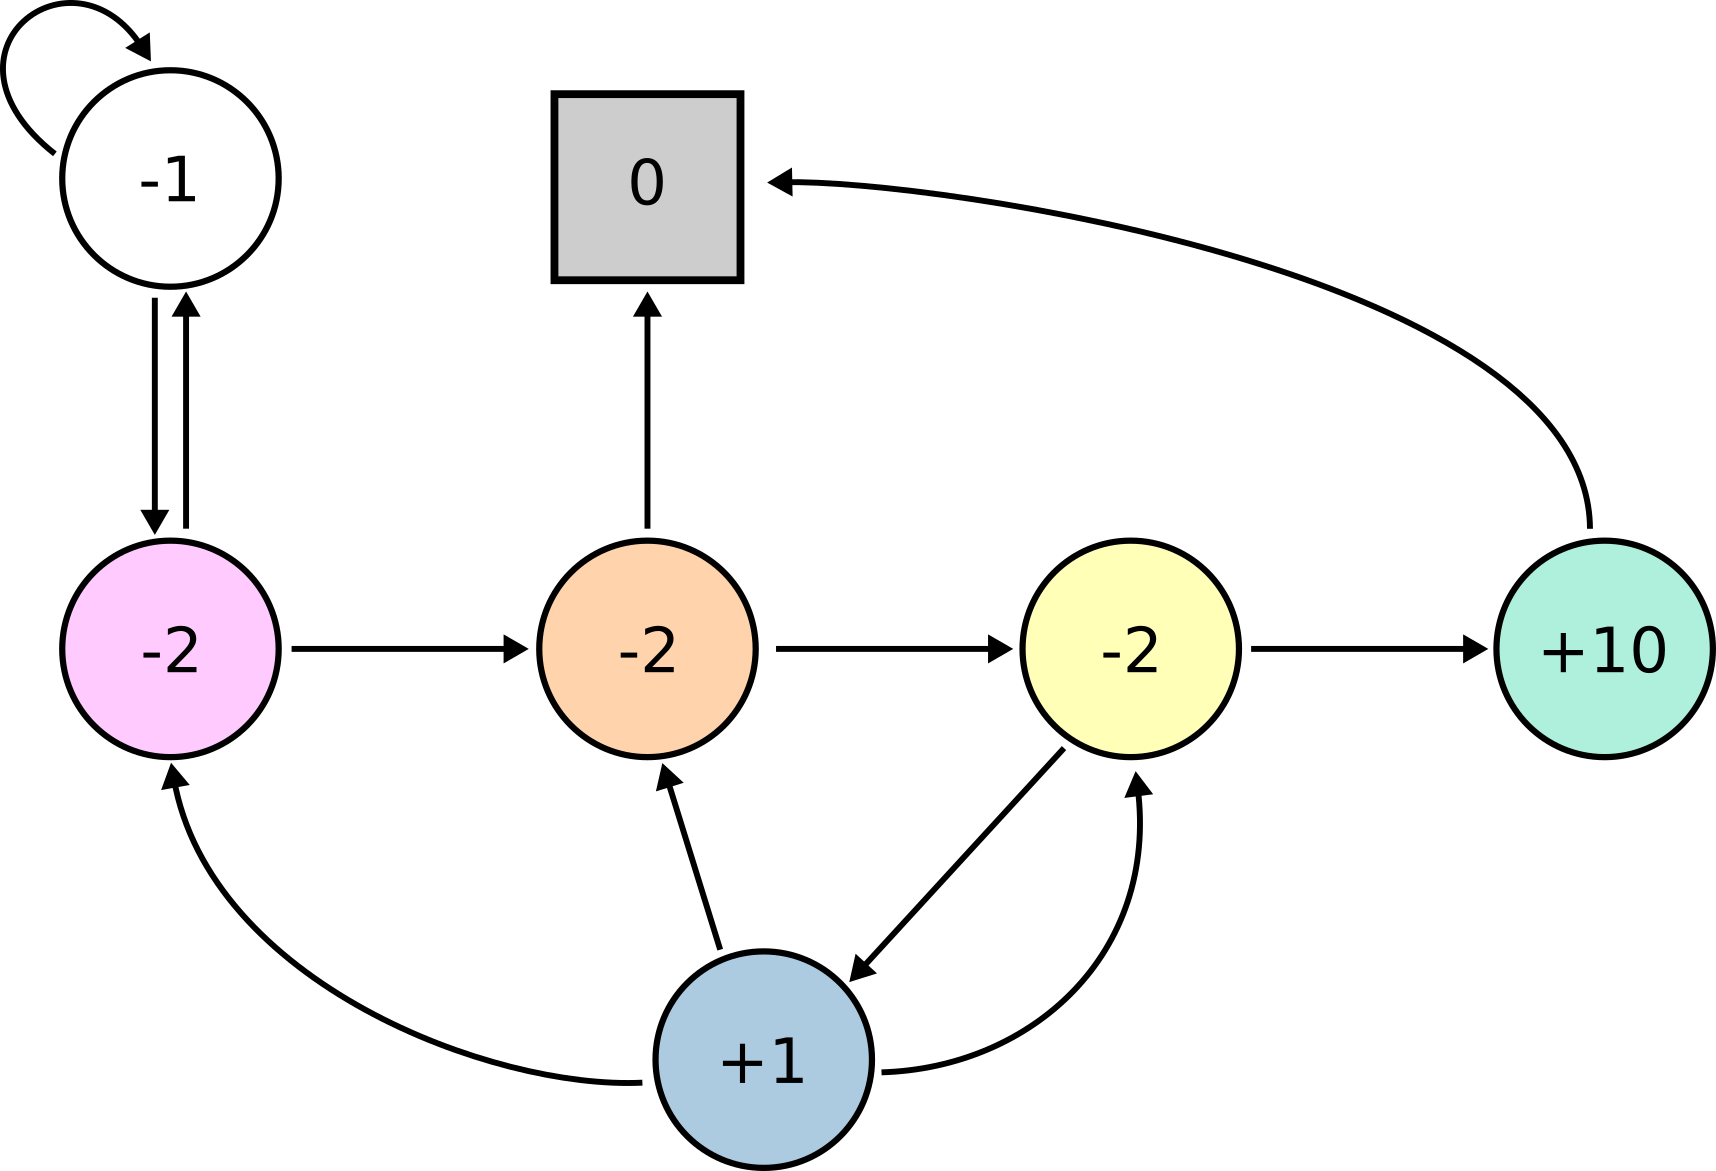

What about when $\gamma = 0.9$? In this case, state values are: 
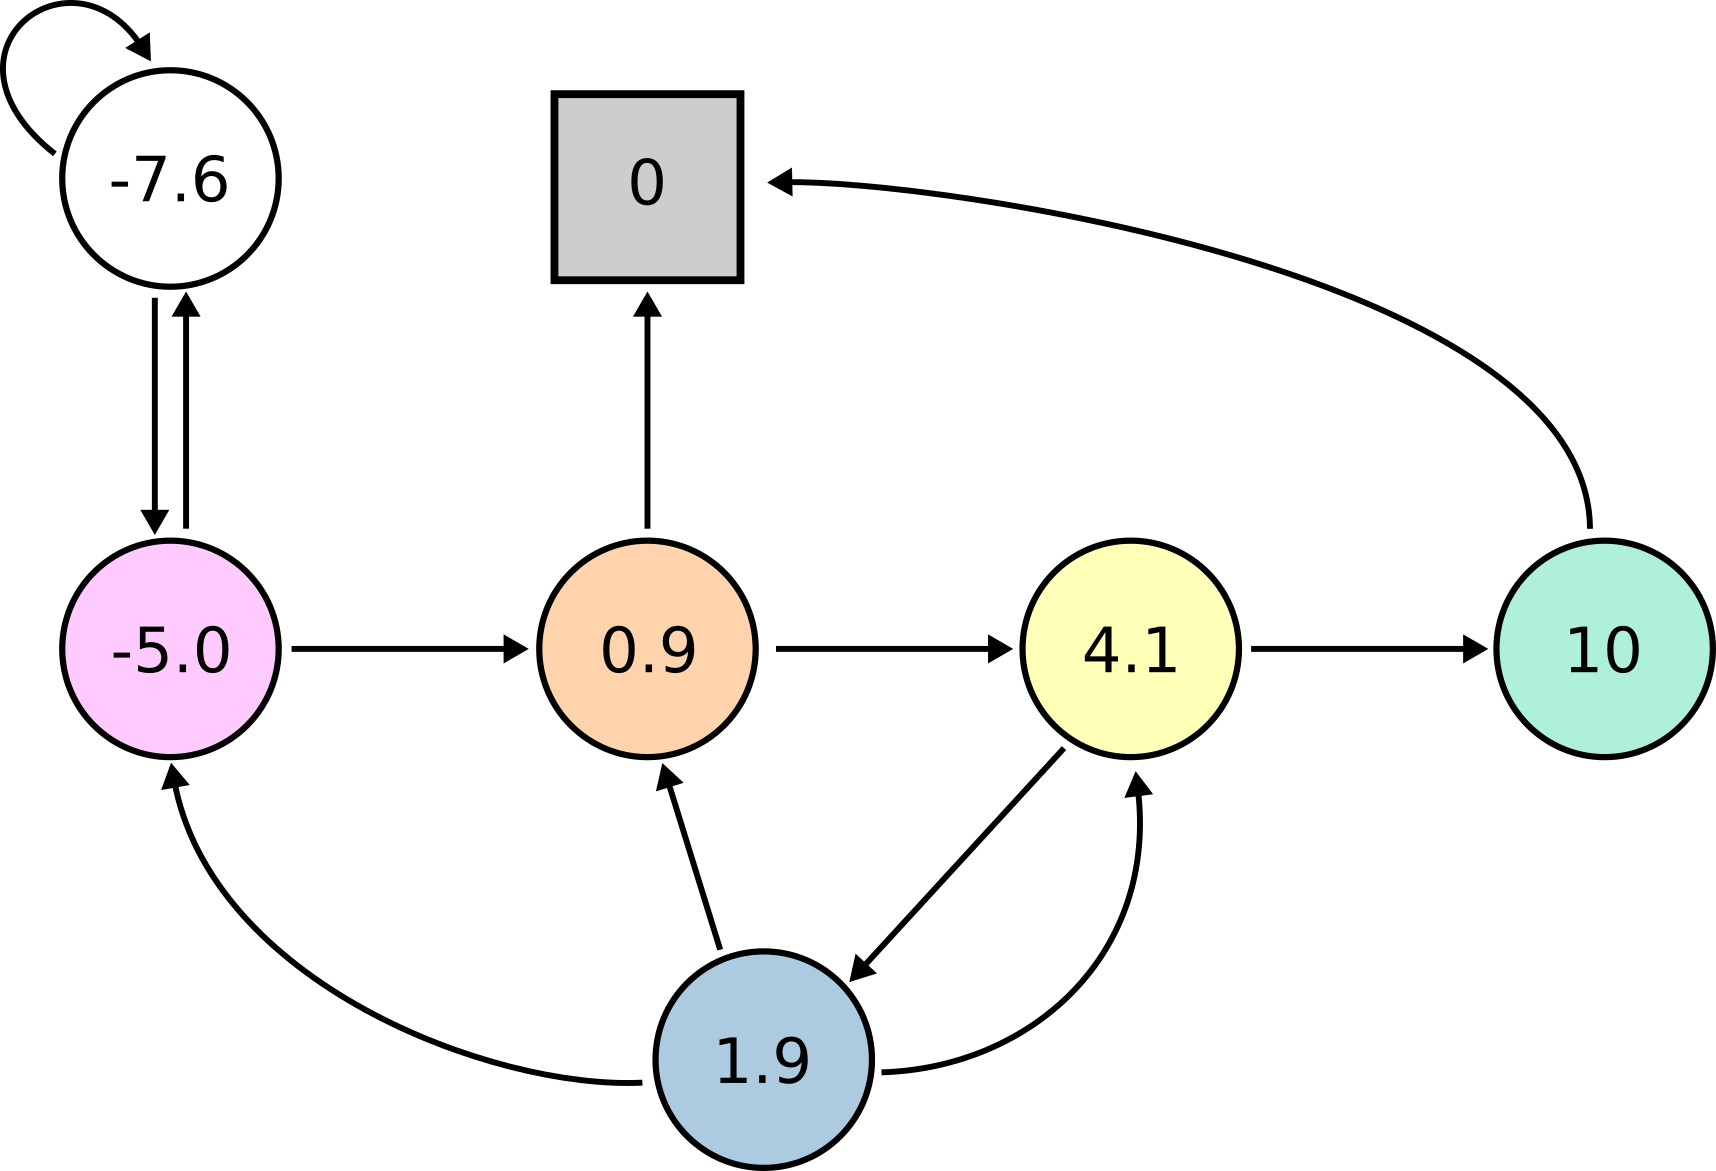

For now, let's take for granted that these are the values. (To test for yourself, we can sample trajectories starting in each state and compute the average gain over all these trajectories. The more samples you take, the more accurate this estimate of the value will be. This is called Monte Carlo sampling and we will discuss this in more detail later.)

In [9]:
mdp.get_MRP_values(S,P,R,gamma=0.9,num_runs=100)

{'C1': -4.257,
 'C2': 0.7865,
 'C3': 3.2908,
 'Pass': 10.0,
 'Pub': 2.0527,
 'FB': -8.1645,
 'Sleep': 0.0}

<b><span style='color:blue'> Holding $\gamma$ fixed, how does the estimate of the value change if you change the number of runs? For 10 runs? For 1000 runs? </span></b>

## Markov Decision Process

In the previous example, we only considered moving between states (effectively, there was only one action to choose, which was "leave this state"). 

Now we will consider what happens when we have some options for how to behave, and those options have different consequences -- i.e. the probability of transitioning between states might be different depending on the actions we choose. 

Consider the following two-action system: 
   - in <span style='color:red'>red</span> is the action we considered previously, let's call this "chill"
   - in <span style='color:blue'>blue</span> we have "study" which has different probabilities of transitioning between states

<div>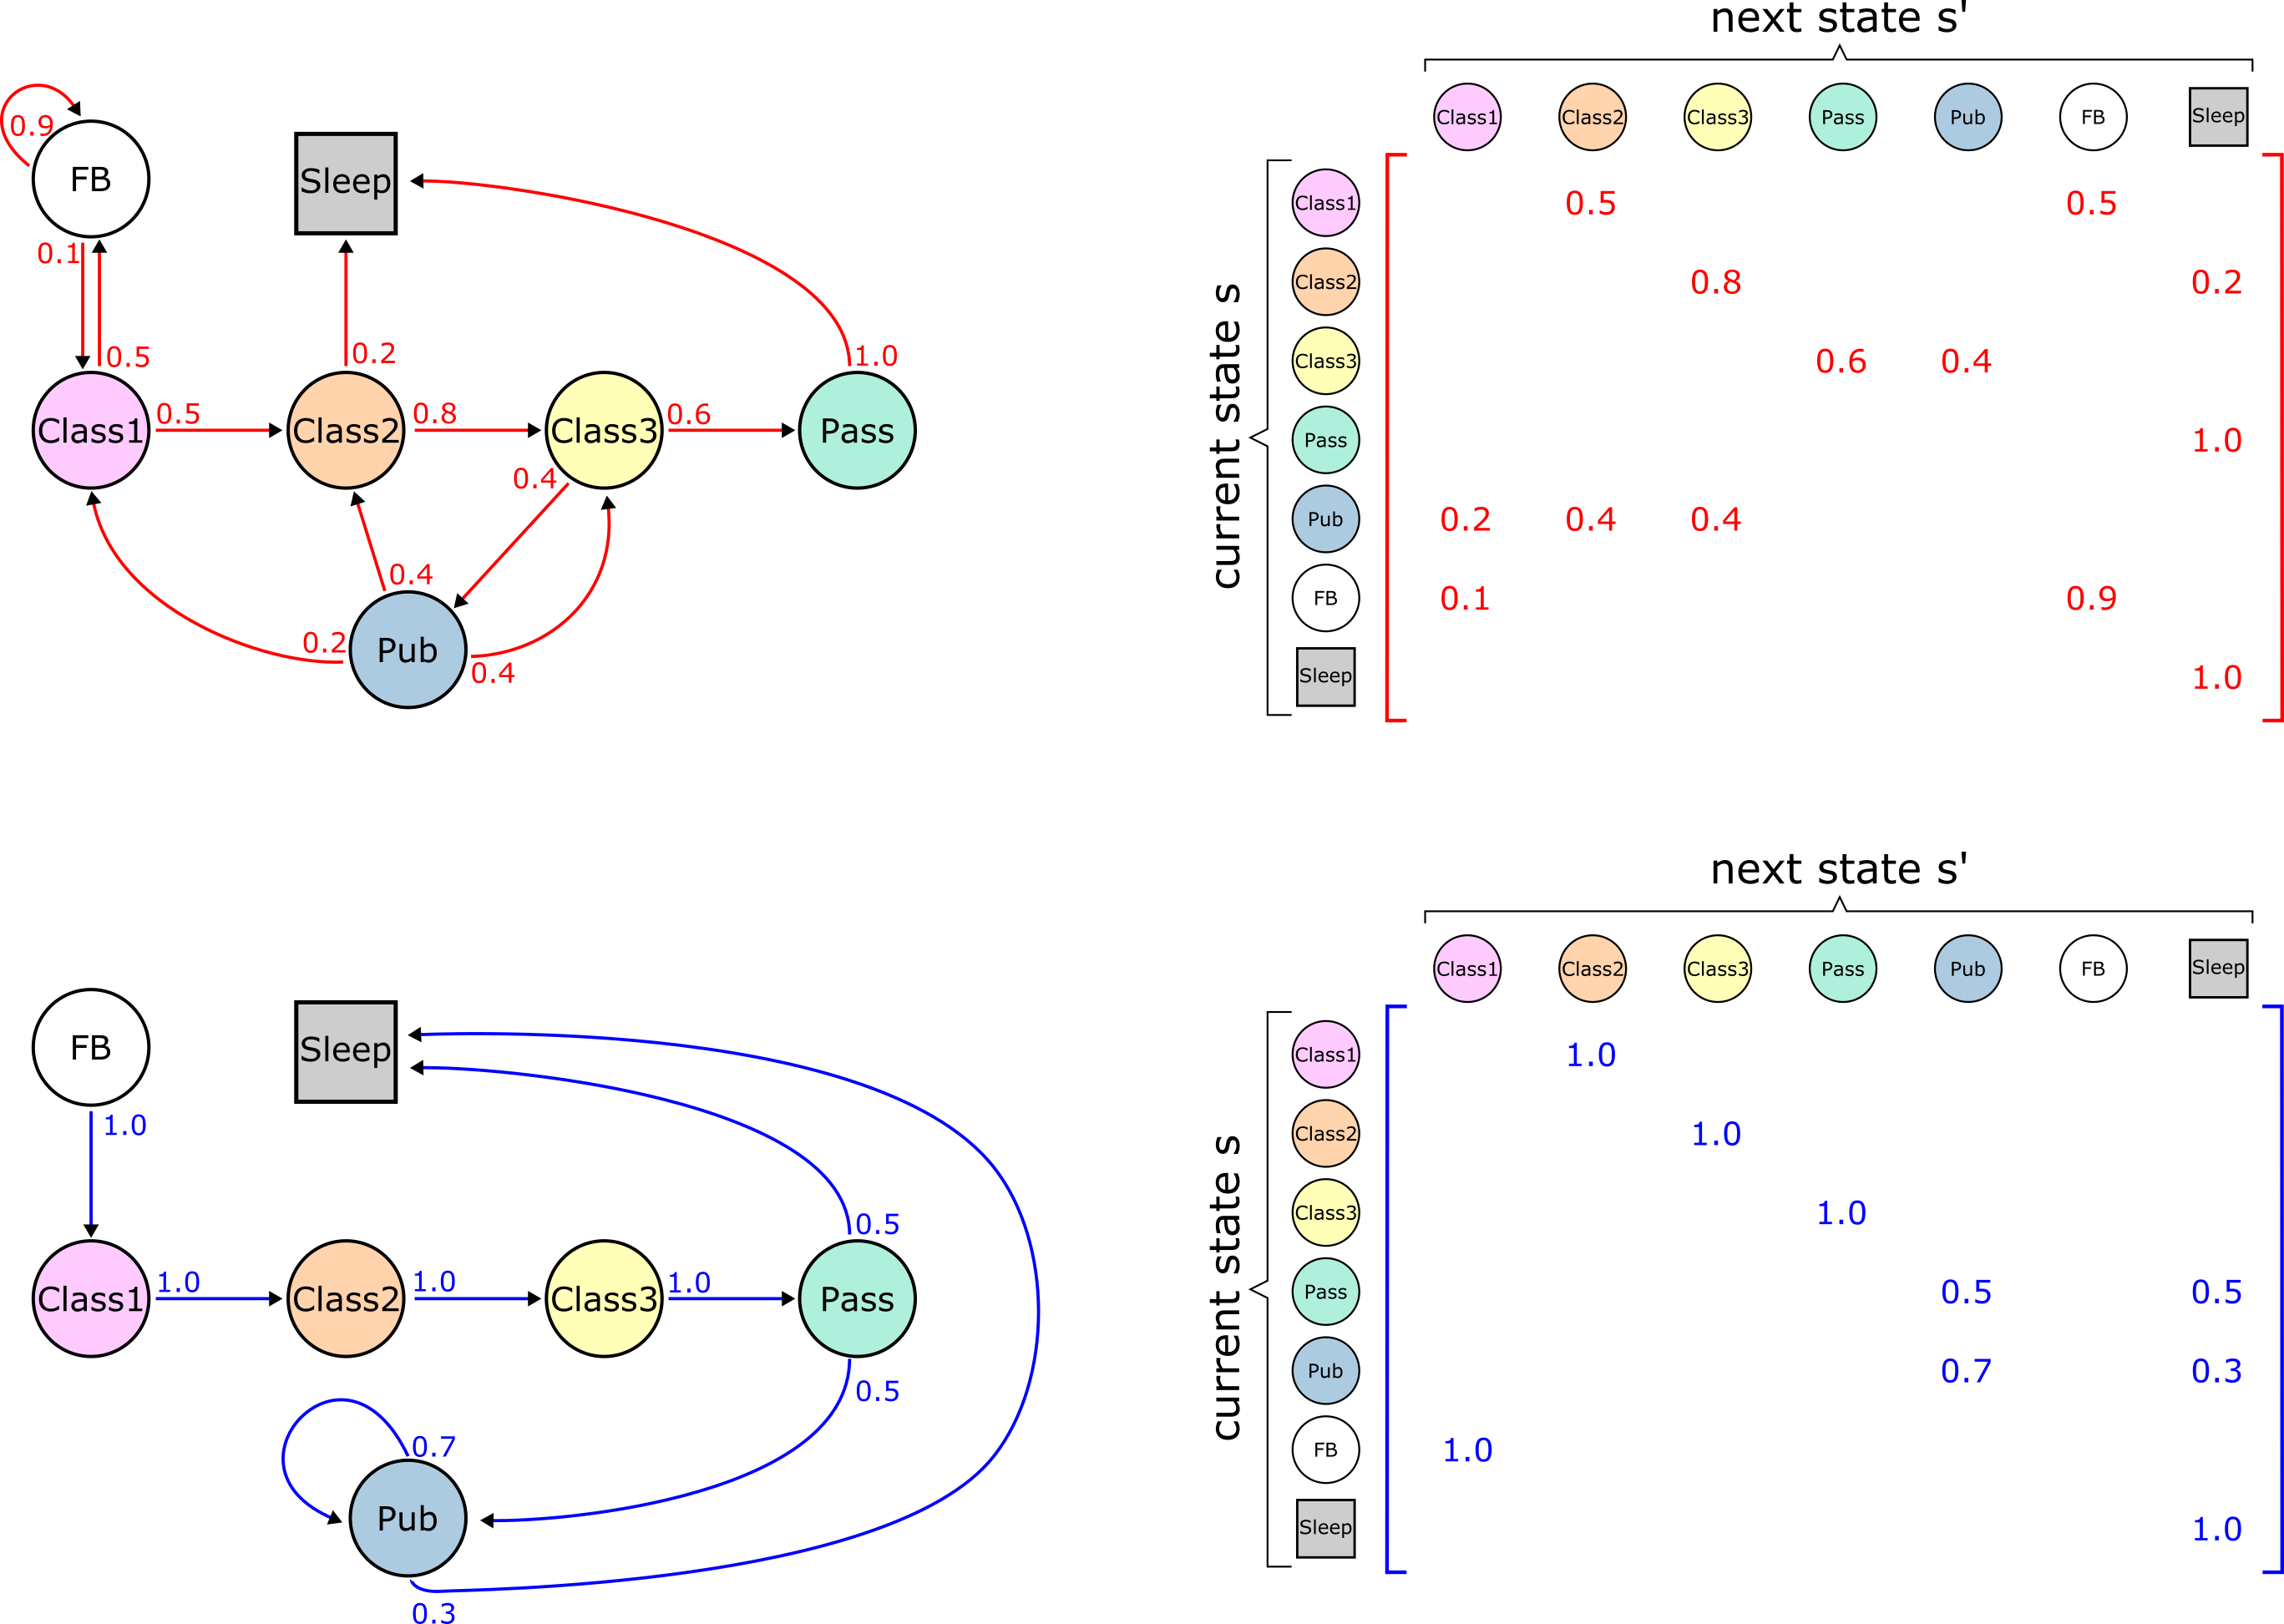</div>


## Markov Decision Proccess (MDP)
A Markov decision process is a Markov reward process with choices/decisions.

<b> DEF </b> A Markov Decision Process (MDP) is a tuple $\langle \mathcal{S},$ <span style="color: red;"> $\mathcal{A}$</span>, $\mathcal{P}, \mathcal{R}, \gamma $ $\rangle$ such that: 

> $\mathcal{S}$ is a finite set of states
>
> <span style="color: red;"> $\mathcal{A}$ is a finite set of actions </span>
>
> $\mathcal{P}$ is the state transition probability matrix, which defines the probability of moving from one state $s$ into a successor state $s'$ 
> $\qquad \mathcal{P} =  \left[\begin{array}{c c c}
                       \mathcal{P}_{11} & \cdots & \mathcal{P}_{1n}\\
                       \vdots & \ddots & \vdots \\
                       \mathcal{P}_{n1}& \cdots & \mathcal{P}_{nn} 
                              \end{array}\right] $
>
> Where  $\mathcal{P}^{\begingroup\color{red}{a}\endgroup}_{ss'} = \mathbb{P}[S_{t+1} = s' | S_{t} = s, \begingroup\color{red}{A_t = a}\endgroup] $
>
> $\mathcal{R}$ is a reward function where $\mathcal{R^{\begingroup\color{red}{a}\endgroup}_{s}} = \mathbb{E}[R_{t+1} | S_{t} = s, \begingroup\color{red}{A_t = a}\endgroup] $
>
> $\gamma$ is a discount factor and $\gamma \in [0,1]$

In [10]:
# define the state transition function as a matrix for each action
P_chill = np.array([[0.0,  0.5, 0.,  0.,  0.,  0.5, 0. ], # matrix representing transition probabilities between states
              [0.,  0.,  0.8, 0.,  0.,  0.,  0.2],
              [0.,  0.,  0.,  0.6, 0.4, 0.,  0. ],
              [0.,  0.,  0.,  0.,  0.,  0.,  1.0],
              [0.2, 0.4, 0.4, 0.,  0.,  0.,  0. ],
              [0.1, 0.,  0.,  0.,  0.,  0.9, 0. ],
              [0.,  0.,  0.,  0.,  0.,  0.,  1.0]])

P_study = np.array([[0.0,  1., 0.,  0.,  0.,  0., 0. ], # matrix representing transition probabilities between states
              [0.,  0.,  1., 0.,  0.,  0.,  0.],
              [0.,  0.,  0.,  1., 0.,  0.,  0.],
              [0.,  0.,  0.,  0., 0.5, 0., 0.5],
              [0., 0., 0., 0.,  0.7,  0.,  0.3 ],
              [1.0, 0.,  0.,  0.,  0.,  0., 0. ],
              [0.,  0.,  0.,  0.,  0.,  0.,  1.0]])

P = np.array([P_chill,P_study])

# the state transition function is a tensor of size (# actions, # of states, #of states)
print('Transition Tensor Dimensions:\n',P.shape)

Transition Tensor Dimensions:
 (2, 7, 7)


In [11]:
reload(mdp)
# recall: chill=0  /  study=1 
action_sequence = [0, 1, 1, 0, 0, 1, 1, 1]
starting_state = 'C1'

T, actions, rewards = mdp.sample_MDP_trajectory(S, P, R, starting_state, action_sequence)

mdp.show_trajectory_table(T, rewards, gammas=[0.9], actions=actions)

ValueError: All arrays must be of the same length

<b><span style='color:blue'>What is going on in the table above for the actions after the Sleep step? </span></b>

For the most part, we don't know the full sequence of actions from the start. Instead, we can make choices at each step. The rule for how we select actions is called the policy, and is denoted $\pi(a|s)$. 

<b> DEF </b> A policy  $\pi(a|s)$ is a probability distribution over actions given the current state of the environment, i.e. 
> $\pi(a|s)$ = P($A_{t}$ = a | $S_{t}$ = s)

One policy is a random policy -- just flip a coin at every step -- will you sleep or study? 

In [25]:
T, actions, rewards = mdp.sample_MDP_trajectory(S, P, R, starting_state, action_sequence=None)

mdp.show_trajectory_table(T, rewards, gammas=[0.1, 0.9], actions=actions)

Step,Actions,Reward,G ($\gamma$=0.1),G ($\gamma$=0.9)
C1,Study,-2,-2.21,1.87
C2,Study,-2,-2.1,4.3
C3,Study,-2,-1,7
Pass,Chill,10,10,10
Sleep,,0,0,0


# Section 2: Understanding the Environment

## Fundamental Building Blocks of the Reinforcement Learning Problem: The Environment

<div>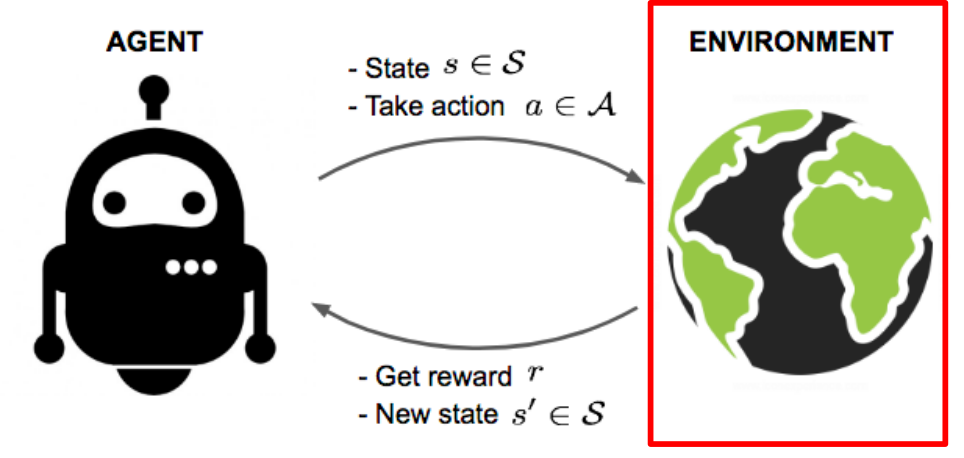</div>

We have already seen an example of a simple environment and what controls its responses to the agent. Next we will explore a simple gridworld environment. Rather than 7 states corresponding to activities in your day, we will look at states as positions on the grid. Rather than abstract actions like "chill" and "study", here we can take moves up, down, left, and right. 

Moves between states are still made according to a state transition function, $\mathcal{P}^{a}_{ss'}$, which specifies the probability of transitioning from state $s$ to state $s'$ as a consequence of taking action $a$. 

As a consequence of moves between states, the environment also gives a numerical reward signal. In many problems, reward is 0 until the very end. In larger environments, this can mean many steps before getting any feedback at all. 

## Trackworld -- a linear gridworld

We start with the simplest gridworld -- a single row with a few columns. 

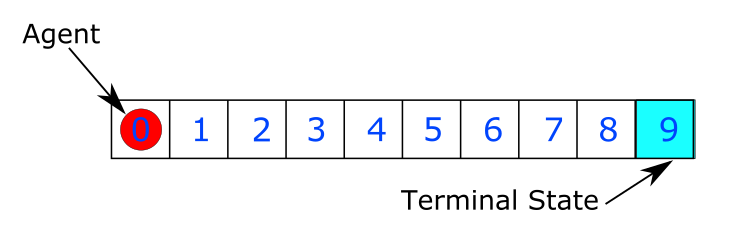

<b><span style="color: blue;">Here you will write some code to determine the state transitions probabilities in P. </span></b>

In [26]:
class TrackWorld(object):
    def __init__(self, n_states=10): 
        self.n_states   = n_states
        self.all_states = np.arange(self.n_states)
        
        self.actions = {'Left':0, 'Right':1}
        self.n_acts  = len(self.actions)
        
        self.start    = 0 # start at position (1,1)
        self.terminal = self.n_states-1 # at position (5,5) episode ends
        self.done     = False
        
        self.P       = self.transition_function()
    
        self.R       = self.reward_function() 
        
    def transition_function(self):
        P = np.zeros((self.n_acts,self.n_states, self.n_states))
        # add transitions between neighbouring states 
        for i in range(1, self.n_states):
            P[0, i, (i-1)] = 1 # left moves
        for i in range(0,self.n_states-1):
            P[1, i, (i+1)] = 1 # right moves

        # ALTERNATIVELY
        # self.P[list(range(1, self.n_states)), list(range(0, self.n_states-1)), 0] = 1 #left
        # self.P[list(range(0, self.n_states-1)), list(range(1, self.n_states)), 1] = 1 #right
        
        # what happens in the end states? 
        P[0,0,0] = 1
        P[1,self.terminal,self.terminal]=1
        return P
    
    def reward_function(self):
        R = np.zeros(self.n_states)
        R[self.terminal] = 10
        return R 
        
    def step(self,state,action):
        if action not in self.actions.keys():  # check if move is valid
            raise Exception('Agent has tried an invalid action!')
        else:
            transition_probs = self.P[self.actions[action],state, :]
            next_state = np.random.choice(self.all_states, p=transition_probs)
            reward = self.R[state]
            if state == self.terminal:
                self.done = True
        return next_state, reward, self.done

<b><span style='color:blue'>Make a new instance of the trackworld class, and make a move in the environment using the function called 'step'.</span></b>

In [27]:
# make an instance of trackworld
tw = TrackWorld()

# test a state an action and make sure it does what it's supposed to do 
state = 5
action= 'Right'
next_state, reward, is_done = tw.step(state,action)
print(f"State {state} / Action {action} => State {next_state} / Reward {reward}")

State 5 / Action Right => State 6 / Reward 0.0


<b><span  style="color: DarkGreen;"> Homework: Write the transition function for a windy trackworld, with wind blowing to the left. </span></b>
    
<span  style="color: DarkGreen;">This means that when the agent moves to the left, the wind pushes it such that it has a probability $k \in [0,1]$ of moving two steps to the left instead of one (and probability $1-k$ of moving the usual 1 step to the left). When the agent is moving to the right, it is moving against the wind so it has a probability of $k$ of staying in the same space and a probability of $1-k$ of moving one step to the right. You can think of $k$ as the strength of the wind. You can pass $k$ as a parameter to your WindyTrack instance. Some starter code is given below. </span>

In [28]:
###########
# Homework 
###########
class WindyTrack(TrackWorld):
    def __init__(self,n_states=10, wind_strength=0.3):
        super().__init__(n_states=n_states)
        self.k = wind_strength
    
    def transition_function(self):
        # compute probabilities of transitions using self.k here 
        pass

## Adding another dimension to Trackworld: Gridworld

Here we have added multiple rows. For simplicity let's do 5 rows and 5 columns = 25 states total. This is enough to do interesting things, but not so many that it's hard to keep track of what's going on with state transitions. 

This also adds two more possible moves: "Up" and "Down". 

For the transition function, we have a tensor of size: 
(number of actions, number of states, number of states). The first dimension reflects represents the actions we could take, the second dimension represents the possible states we could be in currently, and the third dimension reflects the states we could move into. Note that this ordering is not fixed. We can slice the tensor in any way that makes sense. 

We will use the following gridworld as an example, and write some code to turn this schematic into an environment we can interact with. 
<div>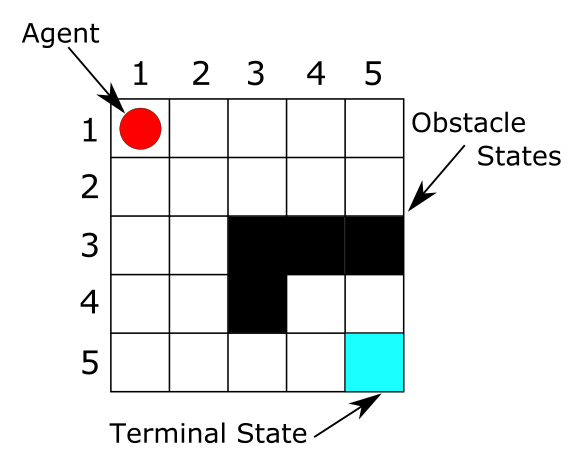</div>

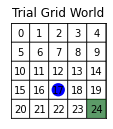

Rewards Function:
 [-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01
 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01
 10.  ]
Transition Matrix for State 17:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [29]:
n_rows, n_cols = 5, 5
step_penalization = -0.01
reload(ef)
gw_open = ef.GridWorld(rows=n_rows,cols=n_cols,
                  #obstacles=[(2,2),(2,3),(2,4),(3,2)], 
                  rewards={(4,4):10},
                  terminals=[(4,4)],
                  step_penalization=step_penalization,
                  actionlist=['Down','Up','Right','Left'],
                  view_labels=True
                 )

print('Rewards Function:\n', gw_open.R)

print(f'Transition Matrix for State {gw_open.state}:\n', gw_open.P[:,gw_open.state,:].T)

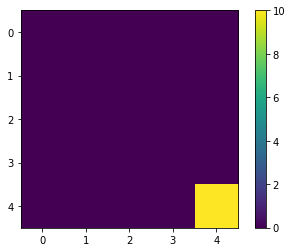

In [67]:
# Visualizing the reward function another way
def plot_reward_map(env):
    R_map = plt.imshow(env.R.reshape(n_rows,n_cols))
    plt.colorbar(R_map)
    plt.show()
    
plot_reward_map(gw_open)

In [50]:
## take a single step in the environment
original_state = gw_open.state
action_name = 'Down'
action_index = gw_open.action_list.index(action_name)
updated_state, reward, done, info = gw_open.step(action_index)
print(f"From state {original_state}, Agent chose action {action_name}, received reward {reward}, and transitioned to state {updated_state}")

From state 12, Agent chose action Down, received reward -0.01, and transitioned to state 17


In [68]:
class RandomAgent(object):
    def __init__(self, num_actions):
        self.num_actions = num_actions
    def select_action(self, state): ## THIS IS THE POLICY FOR BEHAVIOUR
        # state actually does nothing in this agent, but we will want our action selection
        # in later agents to be based on the state we're in so we are setting up the pattern to follow
        action = np.random.choice(self.num_actions)
        return action

In [69]:
# Write a function to count the number of steps it takes for the agent to reach the end 
def navigate(gw, agent, num_runs=250):
    track_steps_to_finish = []
    track_rewards_achieved= []
    for run in range(num_runs):
        done = False
        move_counter   = 0
        reward_counter = 0
        # take moves in the environment until reach the terminal state:
        while not done:
            current_state = gw.state

            # random agent chooses random action 
            action = agent.select_action(gw.state)

            # pass action to environment, observe consequences
            updated_state, reward, done, info = gw.step(action)
            
            # keep running tally of rewards achieved
            reward_counter += reward 
            
            # keep track of how many steps it takes to get to the end
            move_counter += 1 
            
            #if run == 0:
            #    print(f'{current_state}/{action}-->{updated_state}')

        track_steps_to_finish.append(move_counter)
        track_rewards_achieved.append(reward_counter)
        gw.reset()
    return track_steps_to_finish, track_rewards_achieved

# Use a Random Agent to Move Through the Gridworld

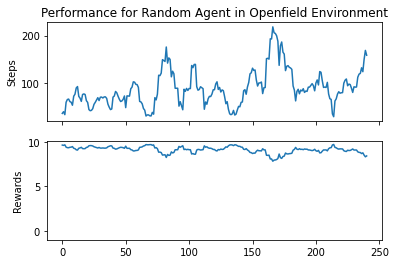

In [70]:
random_walker = RandomAgent(len(gw_open.action_list)) 

open_gw_steps,open_gw_rwds = navigate(gw_open, random_walker)


# plot performance
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(running_mean(open_gw_steps, N=10))
ax[1].plot(running_mean(open_gw_rwds,N=10))
ax[1].set_ylim(-1,10.1)
ax[0].set_ylabel('Steps')
ax[1].set_ylabel('Rewards')
ax[0].set_title('Performance for Random Agent in Openfield Environment')
plt.show()

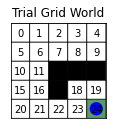

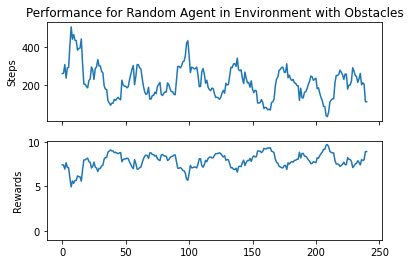

In [71]:
gw_obst = ef.GridWorld(rows=n_rows,cols=n_cols,
                  obstacles=[(2,2),(2,3),(2,4),(3,2)], 
                  rewards={(4,4):10},
                  terminals=[(4,4)],
                  step_penalization=step_penalization,
                  actionlist=['Down','Up','Right','Left'],
                  view_labels=True
                 )

obst_gw_steps,obst_gw_rwds = navigate(gw_obst, random_walker)

## Plot performance 
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(running_mean(obst_gw_steps, N=10))
ax[1].plot(running_mean(obst_gw_rwds,N=10))
ax[1].set_ylim(-1,10.1)
ax[0].set_title('Performance for Random Agent in Environment with Obstacles')
ax[0].set_ylabel('Steps')
ax[1].set_ylabel('Rewards')
plt.show()

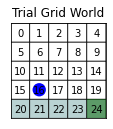

[20, 21, 22, 23, 24, 24]


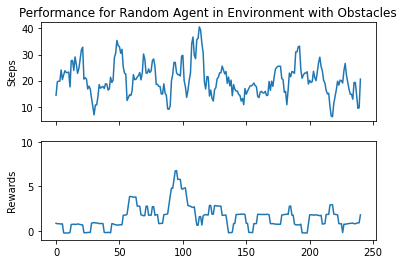

In [72]:
gw_cliff = ef.GridWorld(rows=n_rows,cols=n_cols,
                  rewards={(4,4):10},
                  terminals=[(n_rows-1,c) for c in range(n_cols)],
                  step_penalization=step_penalization,
                  actionlist=['Down','Up','Right','Left'],
                  view_labels=True
                 )

print(gw_cliff.terminal)

cliff_gw_steps, cliff_gw_rwds = navigate(gw_cliff, random_walker)

## Plot performance 
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(running_mean(cliff_gw_steps, N=10))
ax[1].plot(running_mean(cliff_gw_rwds,N=10))
ax[1].set_ylim(-1,10.1)
ax[0].set_title('Performance for Random Agent in Environment with Obstacles')
ax[0].set_ylabel('Steps')
ax[1].set_ylabel('Rewards')
plt.show()

Text(0, 0.5, 'Rewards')

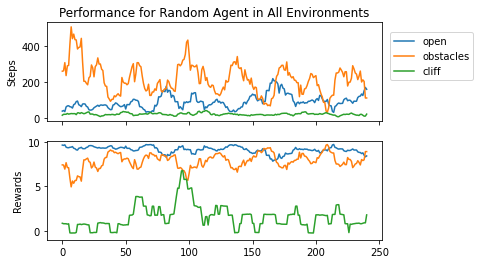

In [73]:
## Plot performance 
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(running_mean(open_gw_steps, N=10),label='open')
ax[0].plot(running_mean(obst_gw_steps, N=10),label='obstacles')
ax[0].plot(running_mean(cliff_gw_steps, N=10),label='cliff')

ax[0].set_title('Performance for Random Agent in All Environments')
ax[0].set_ylabel('Steps')
ax[0].legend(bbox_to_anchor=(1.01,0.95))

ax[1].plot(running_mean(open_gw_rwds,N=10),label='open')
ax[1].plot(running_mean(obst_gw_rwds,N=10),label='obstacles')
ax[1].plot(running_mean(cliff_gw_rwds,N=10),label='cliff')
ax[1].set_ylim(-1,10.1)
ax[1].set_ylabel('Rewards')

#avg_steps = [np.mean(open_gw_steps),np.mean(obst_gw_steps),np.mean(cliff_gw_steps)]
#avg_rwds  = [np.mean(open_gw_rwds),np.mean(obst_gw_rwds),np.mean(cliff_gw_rwds)]


<b><span style="color: blue;"> Try changing the step penalization above and rerun these simulations -- see what happens to the reward collected with the random agent in each type of environment. </span></b>

# Some larger example environments

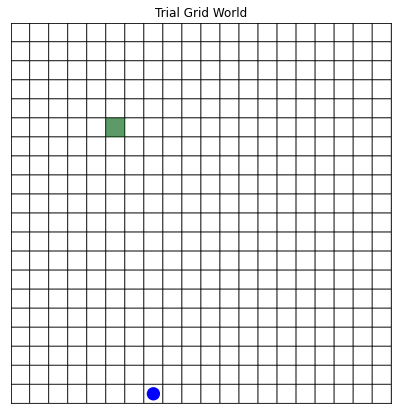

In [74]:
gw_open_large = ef.GridWorld()

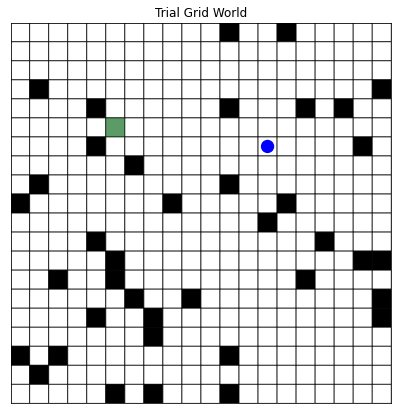

In [29]:
gw_random_obs = ef.GridWorld_random_obstacle()

In [ ]:
gw_divided = ef.GridWorld_bar()

In [ ]:
gw_4rooms = ef.GridWorld_4rooms()

In [ ]:
gw_tunnel = ef.GridWorld_tunnel()

In [ ]:
gw_hairpinmaze = ef.GridWorld_hairpin()

<b><span style='color:DarkGreen'>Homework: Test the random walk agent on the `gridworld_open` and `gridworld_open_large` environments, and plot the rewards achieved in both.</span></b>

These larger spaces are unlikely to yield much reward, especially for agents using a random policy. 

Next, we will look at some ways agents learn how to behave by evaluating how much reward each action is likely to lead to in the long term.

# Section 3: Understanding Agents & *Actually Learning* from Trial and Error
As discussed previously, the reinforcement learning problem is one where we are interested in how an agent learns from its interaction with the environment it operates in. The agent gets information from the environment about what state it is in, and chooses how to act in that state. The learning problem is about how to make better and better choices with the information you have. 

<div>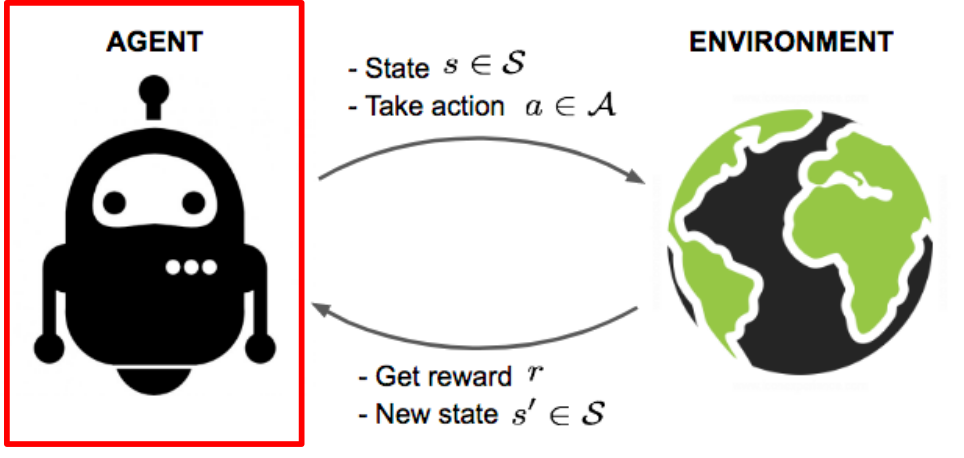</div>

Here we will focus on what pieces go into an agent so that it can learn to make choices. We have already seen the agent which just uses the random policy. However, this does not take into account any information about performance, and has no mechanism for altering its policy toward something better. In this section we will show some examples of how to build agents that learn from experience.  

### First we will choose an environment to test all of our learners in 

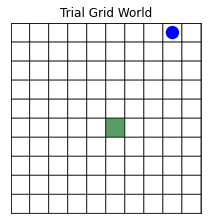

In [110]:
n_rows, n_cols = 10,10
step_penalization = -0.01
env = ef.GridWorld(rows=n_rows,cols=n_cols,
                  #obstacles=[(3,2),(3,3),(3,4),(4,2),(5,2),(3,5),(3,6),(3,7)], 
                  rewards={(5,5):10},
                  terminals=[(5,5)],
                  step_penalization=step_penalization,
                  actionlist=['Down','Up','Right','Left'],
                  view_labels=False)

### Let's set up the basic framework that all of our tabular agents will use

In [111]:
class TabularAgent(object):
    def __init__(self, nstates, nactions, 
                 learning_rate=0.1, discount=0.9, epsilon=1.0):
        
        self.num_actions = nactions
        self.action_space = np.arange(self.num_actions)

        # this agent selects actions from a table of state,action values which we initalize randomly
        #self.q_table = np.random.uniform(low=-1, high=1, size=(nstates, nactions))
        self.q_table = np.zeros((env.nstates, env.nactions))

        # parameters for learning
        self.epsilon       = epsilon
        self.learning_rate = learning_rate
        self.discount      = discount
        
    def choose_action(self, state):
        # this agent uses epsilon-greedy action selection, meaning that it selects 
        # the greedy (highest value) action most of the time, but with epsilon probability
        # it will select a random action -- this helps encourage the agent to explore
        # unseen trajectories
        if np.random.random()>self.epsilon:
            # take the action which corresponds to the highest value in the q table at that row (state)
            action = np.argmax(self.q_table[state]) 
        else:
            action=np.random.choice(self.action_space)
        return action

## Monte Carlo Agents Update Q Values From Computed Return

In [112]:
# MC Learning of the state value function
class MC_Agent(TabularAgent):
    def __init__(self, nstates,nactions, learning_rate=0.1, discount=0.95, epsilon=1.0):
        super().__init__(nstates,nactions, learning_rate=learning_rate , discount=discount, epsilon=epsilon)

    def update_q_table(self, current_state, current_action, computed_return):
        # this function describes how the Q table gets updated so the agent can make 
        # better choices based on what it has experienced from the environment 
        current_q = self.q_table[current_state, current_action]

        new_q = (1-self.learning_rate)*current_q + self.learning_rate*(computed_return)
        self.q_table[current_state, current_action] = new_q
        
    def navigate(self, env, num_episodes, random_start=False, start=0):
        # set how we will decay the randomness of action selection over the course of training
        start_eps_decay = 1
        end_eps_decay = num_episodes//2
        epsilon_decay_value = self.epsilon/(end_eps_decay-start_eps_decay)

        # initialize empty list for keeping track of rewards achieved per episode
        reward_tracking=[]
        max_steps= 1000

        for episode in range(num_episodes):
            env.reset()
            # initalize reward counter
            total_reward=0

            # get first state and action
            if random_start:
                state=np.random.choice(env.nstates)
            else:
                state=start
            
            states, actions, rewards = [], [], []
            for step in range(max_steps):
                action = self.choose_action(state)
                # take a step in the environment
                next_state, reward, done, _ = env.step(action)

                total_reward+=reward

                if not done:
                    states.append(state)
                    actions.append(action)
                    rewards.append(reward)
                else:
                    break
                state=next_state
            
            # compute return
            returns = discount_rwds(rewards)
            for i in range(len(states)):
                self.update_q_table(states[i],actions[i],returns[i])
            
            reward_tracking.append(total_reward)

            if end_eps_decay >= episode >= start_eps_decay:
                self.epsilon -= epsilon_decay_value

        return reward_tracking

### How does the MC Agent Perform in this environment? 

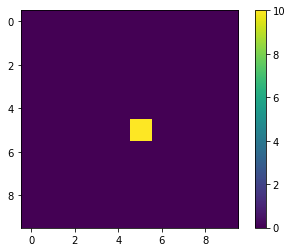

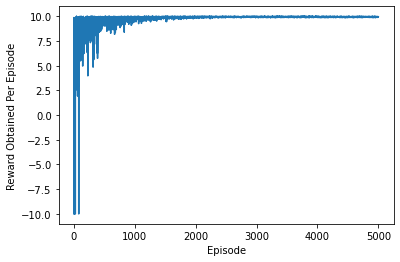

In [144]:
## let's look at the reward function on the environment:
plot_reward_map(env)

## run the MC agent through the environment to learn the reward landscape 
mc_learner = MC_Agent(env.nstates, env.nactions)
mc_rewards = mc_learner.navigate(env, num_episodes=5000)

## show the rewards achieved 
plt.plot(mc_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward Obtained Per Episode')
plt.show()

### Let's look at what the agent has learned by inspecting the Q values in its table

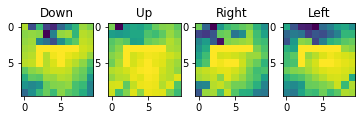

In [145]:
## show the value map learned by the agent
# Show values for each action
fig, ax = plt.subplots(1,4)
for i in range(4):
    ax[i].imshow(mc_agent.q_table[:,i].reshape(n_rows,n_cols))
    ax[i].set_title(env.action_list[i])
plt.show()

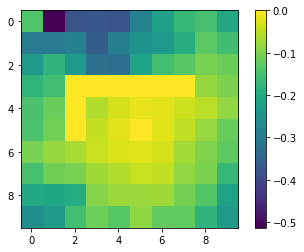

In [146]:
# show average across actions ~ V(s)
a = np.mean(mc_agent.q_table, axis=1).reshape(n_rows,n_cols)

f = plt.imshow(a)
plt.colorbar(f)
plt.show()

## TD Learning Methods: Q Learning and SARSA

Now we will look at an alternative strategy for learning state-action-values: Temporal difference (TD) learning. TD learning uses one piece of experience information (one-step observed reward) plus its guess of future value to update its guess of the state value. 

Q learning and SARSA are two different methods of doing TD learning. They differ based on which policy they use for learning. SARSA is an **on** policy algorithm, meaning it uses the same policy for behaviour (selecting actions) and for optimization (learning updates). Q-learning is an **off** policy algorithm, meaning it uses a different policy for behaving ($\epsilon$-greedy policy) and for optimizing (pure greedy policy). 

In [147]:
# TD Agents
class Q_Agent(TabularAgent):
    def __init__(self, nstates,nactions, learning_rate=0.1, discount=0.95, epsilon=1.0):
        super().__init__(nstates,nactions, learning_rate=learning_rate , discount=discount, epsilon=epsilon)

    def update_q_table(self, current_state, current_action, reward, new_state):
        # this function describes how the Q table gets updated so the agent can make 
        # better choices based on what it has experienced from the environment 
        current_q = self.q_table[ current_state, current_action]
        max_future_q = np.max(self.q_table[new_state,:])

        new_q = (1-self.learning_rate)*current_q + self.learning_rate*(reward + self.discount*max_future_q)
        self.q_table[current_state, current_action] = new_q
        
    def navigate(self, env, num_episodes, random_start=False, start=0):
        # set how we will decay the randomness of action selection over the course of training
        start_eps_decay = 1
        end_eps_decay = num_episodes//2
        epsilon_decay_value = self.epsilon/(end_eps_decay-start_eps_decay)

        # initialize empty list for keeping track of rewards achieved per episode
        reward_tracking=[]
        max_steps= 1000

        for episode in range(num_episodes):
            env.reset()
            # initalize reward counter
            total_reward=0

            # get first state and action
            if random_start:
                state=np.random.choice(env.nstates)
            else:
                state=start

            for step in range(max_steps):
                action = self.choose_action(state)
                # take a step in the environment
                next_state, reward, done, _ = env.step(action)

                total_reward+=reward

                if not done:
                    self.update_q_table(state, action, reward, next_state)
                else:
                    self.q_table[state, action] = 0
                    break
                state=next_state

            reward_tracking.append(total_reward)

            if end_eps_decay >= episode >= start_eps_decay:
                self.epsilon -= epsilon_decay_value

        return reward_tracking

### Because Q and SARSA need to keep track of slightly different information, we will write two functions for how they navigate the environment 

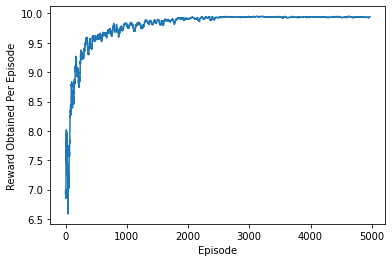

In [148]:
q_learner = Q_Agent(env.nstates, env.nactions)
q_rewards = q_learner.navigate(env, num_episodes=5000)

plt.plot(running_mean(q_rewards,N=30))
plt.xlabel('Episode')
plt.ylabel('Reward Obtained Per Episode')
plt.show()

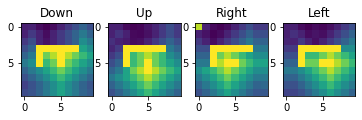

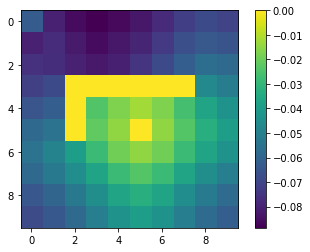

In [149]:
# Show values for each action
fig, ax = plt.subplots(1,4)
for i in range(4):
    ax[i].imshow(q_learner.q_table[:,i].reshape(n_rows,n_cols))
    ax[i].set_title(env.action_list[i])
plt.show()

# show average across actions ~ V(s)
a = np.mean(q_learner.q_table, axis=1).reshape(n_rows,n_cols)

f = plt.imshow(a)
plt.colorbar(f)
plt.show()

In [150]:
## SARSA -- same same but different
class SARSA_Agent(TabularAgent):
    def __init__(self, nstates,nactions, learning_rate=0.1, discount=0.95, epsilon=1.0):
        super().__init__(nstates,nactions, learning_rate=learning_rate , discount=discount, epsilon=epsilon)

    #updates q values after each step 
    # similar to Q update but with one key difference -- we use the action we *actually* took
    # rather than guessing we took the max value action
    # with epsilon probability, we will have actually taken a random action, so SARSA wants to account for that 
    def update_q_table(self, current_state, current_action, reward, next_state, next_action):
        current_q = self.q_table[ current_state, current_action]
        future_q = self.q_table[ next_state, next_action] # np.max(self.q_table[new_state,:])

        new_q = (1-self.learning_rate)*current_q + self.learning_rate*(reward + self.discount*future_q)
        self.q_table[current_state, current_action] = new_q
        
    def navigate(self, env, num_episodes, random_start=False, start=0): # takes sarsa_agent as input 
        #-- will not work w Q_agent bc takes additional argument of next_state in update_q_table function
        # set how we will decay the randomness of action selection over the course of training
        start_eps_decay = 1
        end_eps_decay = num_episodes//2
        epsilon_decay_value = self.epsilon/(end_eps_decay-start_eps_decay)

        # initialize empty list for keeping track of rewards achieved per episode
        reward_tracking=[]
        max_steps= 100

        for episode in range(num_episodes):
            env.reset()
            # initalize reward counter
            total_reward=0

            # get first state and action
            if random_start:
                state=np.random.choice(env.nstates)
            else:
                state=start
            action = self.choose_action(state)

            for step in range(max_steps):
                # take a step in the environment
                next_state, reward, done, _ = env.step(action)

                total_reward+=reward

                if not done:
                    next_action = self.choose_action(next_state)
                    self.update_q_table(state, action, reward, next_state, next_action)
                else:
                    self.q_table[state, action] = 0
                    break
                state=next_state
                action=next_action

            reward_tracking.append(total_reward)

            if end_eps_decay >= episode >= start_eps_decay:
                self.epsilon -= epsilon_decay_value

        return reward_tracking

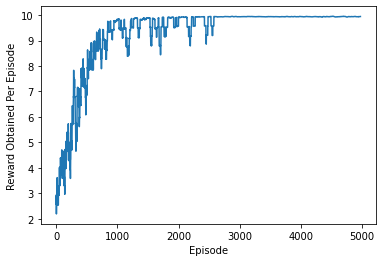

In [151]:
sarsa_learner = SARSA_Agent(env.nstates, env.nactions)
sarsa_rewards = sarsa_learner.navigate(env, num_episodes=5000)

plt.plot(running_mean(sarsa_rewards,N=30))
plt.xlabel('Episode')
plt.ylabel('Reward Obtained Per Episode')
plt.show()

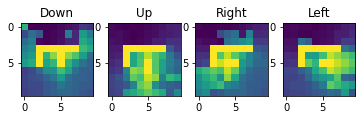

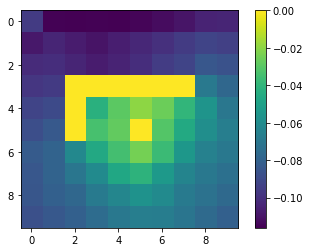

In [152]:
# show values under different learners
# Show values for each action
fig, ax = plt.subplots(1,4)
for i in range(4):
    ax[i].imshow(sarsa_learner.q_table[:,i].reshape(n_rows,n_cols))
    ax[i].set_title(env.action_list[i])
plt.show()

# show average across actions ~ V(s)
a = np.mean(sarsa_learner.q_table, axis=1).reshape(n_rows,n_cols)

f = plt.imshow(a)
plt.colorbar(f)
plt.show()

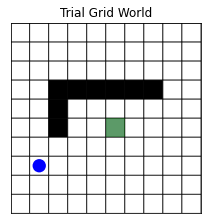

In [153]:
# make an environment we will use for these tabular agents 
n_rows, n_cols = 10,10
step_penalization = -0.01
env = ef.GridWorld(rows=n_rows,cols=n_cols,
                  obstacles=[(3,2),(3,3),(3,4),(4,2),(5,2),(3,5),(3,6),(3,7)], 
                  rewards={(5,5):10},
                  terminals=[(5,5)],
                  step_penalization=step_penalization,
                  actionlist=['Down','Up','Right','Left'],
                  view_labels=False)

Reward Function in Environment:


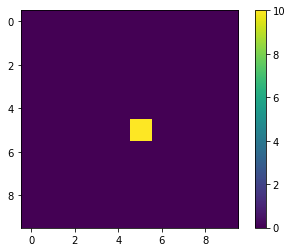

Running MC Agent...
Done
Running Q-Learning Agent...
Done
Running SARSA Agent...
Done


In [156]:
## let's look at the reward function on the environment:
print('Reward Function in Environment:')
plot_reward_map(env)

number_of_episodes = 5000

## run the MC agent through the environment
mc_learner = MC_Agent(env.nstates, env.nactions)
print('Running MC Agent...'),
mc_rewards = mc_learner.navigate(env, num_episodes=number_of_episodes)
print('Done')

## run the Q learning agent through the environment 
q_learner = Q_Agent(env.nstates, env.nactions)
print('Running Q-Learning Agent...')
q_rewards = q_learner.navigate(env, num_episodes=number_of_episodes)
print('Done')

## run the Q learning agent through the environment 
sarsa_learner = SARSA_Agent(env.nstates, env.nactions)
print('Running SARSA Agent...')
sarsa_rewards = sarsa_learner.navigate(env, num_episodes=number_of_episodes)
print('Done')

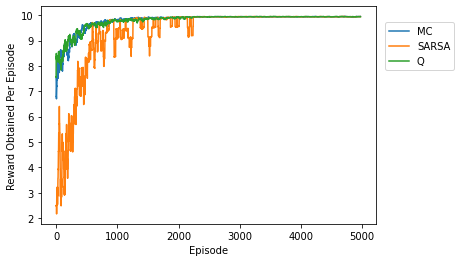

In [157]:
## Plot agent performance for all agents
smoothing = 30
plt.plot(running_mean(mc_rewards,N=smoothing), label='MC')
plt.plot(running_mean(sarsa_rewards,N=smoothing), label='SARSA')
plt.plot(running_mean(q_rewards,N=smoothing), label='Q')
plt.legend(bbox_to_anchor=(1.25,0.95))
plt.xlabel('Episode')
plt.ylabel('Reward Obtained Per Episode')
plt.show()

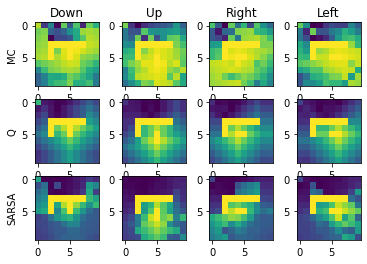

In [159]:
## Compare Values Learned by Agents 
fig, ax = plt.subplots(3,env.nactions)
for i in range(env.nactions):
    ax[0,i].imshow(mc_learner.q_table[:,i].reshape(n_rows,n_cols))
    ax[1,i].imshow(q_learner.q_table[:,i].reshape(n_rows,n_cols))
    ax[2,i].imshow(sarsa_learner.q_table[:,i].reshape(n_rows,n_cols))
    ax[0,i].set_title(env.action_list[i])

ax[0,0].set_ylabel('MC')
ax[1,0].set_ylabel('Q')
ax[2,0].set_ylabel('SARSA')
plt.show()

<b><span style='color:blue'> Try the above code in different environments, see how these agents are similar or different depending on the conditions they have to learn </span></b>

# Mini Projects 

### Level 0: I want to get a better sense of the fundamentals
- Create your own variant of a gridworld task and solve it using the one (or all) of the learners we built during the turorial (MC/Q/SARSA agents)
    - Specify your own reward and transition functions (eg. what if you made a gridworld where the agent moved like Pacman?).  
    - Explore action-dependent reward functions. What if the agent can only get the reward by taking a specific action? Introduce a new 'special' action in addition to Up/Down/Left/Right. Remember to account for this in both your transition function and reward functions.
   

### Level 1: I'm comfortable with fundamentals and want to try an extension of something we did already
- Explore making a new kind of environment. Solve the Knight's Tour task (suggestion: try both MC and Q learning, pick one to start and if you get it working, try the other).
  - The Knight's Tour problem is to move a knight around a chess board such that it visits every position on the 8x8 board once and only once. The knight moves in an L-shape. 
  - For this problem you will need to write a new transition function for an 8x8 open field gridworld.
  - You will also need to determine how you want to shape the rewards for the task, as well as starting and stopping conditions. How does your agent get feedback?   
- Explore how the agents we looked at in a single environment behave across different environments. Compare and contrast the performance of a Q-Learner against a SARSA learner in different environments. 
    - A SARSA agent updates the Q table in an ''on-policy'' fashion -- i.e. using the same policy as the one used to select actions. By contrast, Q learning is an ''off-policy'' algorithm, where the agent updates its Q values using a different policy than the one it used to select actions (the agent selects actions with an epsilon greedy policy, but updates Q values with a greedy policy). 
    - Hint: Use the cliffworld environment -- why do these agents perform about the same in other environments, and what is it about this environment that highlights their differences?

### Level 2: I want to explore some things we hinted at but didn't go into detail
- Project: Build a model-based agent (Dyna Q) to navigate a gridworld task of your design (use the Gridworld class from env_functions) 
    - A Dyna agent relies on interative phases of model construction from sampling experience, and action/rewards collection from acting based on model-generated 
- Project: Build a neural network to do Q learning (**) ~ DQN 

### Level 3: All this is childs play give me something hard
- Project: Solve a gridworld task with an actor-critic network agent -- use PyTorch
    - Construct a neural network (input / single hidden / output layers are fine, no need for deep architecture). What information do you want to include in the input? What information do you need in the actor & critic output layers? 
    - What are appropriate loss functions?
    - Decide how to represent the state information to the network. What sort of semantic details are important to include?


--------------------

# References 

- Sutton and Barto, An Introduction to Reinforcement Learning 
- David Silver [Lecture Notes](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html)
- Omer Sezer RL Overview [Tutorials](https://github.com/omerbsezer/Reinforcement_learning_tutorial_with_demo) 


## Some interesting papers
- Q-Learning: V. Mnih, K. Kavukcuoglu, D. Silver, A. Graves, I. Antonoglou, et al. “Playing Atari with Deep Reinforcement Learning”. (2013).
- V. Mnih, K. Kavukcuoglu, D. Silver, et al. "Human-level control through deep reinforcement learning" (Nature-2015).
- Schulma et al. "Proximal Policy Optimization Algorithms"(2017).
- Hasselt et al. "Deep Reinforcement Learning with Double Q-learning" (2015).
- Schaul et al. "Prioritized Experience Replay" (2015).
- AlphaGo- Supervised learning + policy gradients + value functions + Monte Carlo tree search D. Silver, A. Huang, C. J.Maddison, A. Guez, L. Sifre, et al. “Mastering the game of Go with deep neural networks and tree search”. Nature (2016).